# <font color="Red"> Credit EDA Case Study </font>

By

- S R Nikita Gulabi Kuchimanchi (niki.feb20@gmail.com)
- Pravalika Bende (sonybende97@gmail.com)

# Part 1

**Business Objectives**

    This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

    In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

In [1]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Filtering out the warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
#Setting column visibility

pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',150)

### Datasets
Given are two datasets :
1. **application_data.csv** which contains all the information of the client at the time of application. The data is about whether a client has payment difficulties. 

2. **previous_application.csv** contains information about the client’s previous loan data. It contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer.

## Task 1 : Data Sourcing

### <font color="Green"> ApplicationData </font>

### Task 1.1 : Reading ApplicationData

In [4]:
# Reading application_data.csv file
ApplicationData = pd.read_csv(r'F:\E anf F drives\F\Upgrad - DS PGD\Data Toolkit\Credit EDA Case Study\application_data.csv')

#checking rows of app_data df
ApplicationData.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

### Task 1.2 : Inspecting ApplicationData

In [5]:
# Check number of rows and columns in the dataframe
ApplicationData.shape

(307511, 122)

In [6]:
# Check column-wise info of the dataframe

##Arguments : verbose - to print full summary & null_counts to see null count information

ApplicationData.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

**All the columns are of datatypes, which they should be. Therefore, there are no need of datatype conversions**

In [7]:
# Check the summary for the numeric columns 
ApplicationData.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [8]:
#Checking null value count
ApplicationData.isnull().sum().sort_values(ascending=False)

COMMONAREA_MEDI                 214865
COMMONAREA_AVG                  214865
COMMONAREA_MODE                 214865
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAPARTMENTS_MEDI        213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_MODE           210199
LIVINGAPARTMENTS_AVG            210199
LIVINGAPARTMENTS_MEDI           210199
FLOORSMIN_AVG                   208642
FLOORSMIN_MODE                  208642
FLOORSMIN_MEDI                  208642
YEARS_BUILD_MEDI                204488
YEARS_BUILD_MODE                204488
YEARS_BUILD_AVG                 204488
OWN_CAR_AGE                     202929
LANDAREA_MEDI                   182590
LANDAREA_MODE                   182590
LANDAREA_AVG                    182590
BASEMENTAREA_MEDI               179943
BASEMENTAREA_AVG                179943
BASEMENTAREA_MODE               179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_MODE              169682
NONLIVINGAREA_AVG        

In [9]:
#Checking null value count
#As the number is huge, calculating null values in terms of mean-%

round(ApplicationData.isnull().mean()*100, 2).sort_values(ascending=False)

COMMONAREA_MEDI                 69.87
COMMONAREA_AVG                  69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAPARTMENTS_MEDI        69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MODE           68.35
LIVINGAPARTMENTS_AVG            68.35
LIVINGAPARTMENTS_MEDI           68.35
FLOORSMIN_AVG                   67.85
FLOORSMIN_MODE                  67.85
FLOORSMIN_MEDI                  67.85
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_MODE                66.50
YEARS_BUILD_AVG                 66.50
OWN_CAR_AGE                     65.99
LANDAREA_MEDI                   59.38
LANDAREA_MODE                   59.38
LANDAREA_AVG                    59.38
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MODE              55.18
NONLIVINGAREA_AVG               55.18
NONLIVINGARE

### <font color="Green"> PrevApplication </font>

### Task 1.3 : Reading PrevApplication

In [10]:
#Reading previous_application.csv file
PrevApplication = pd.read_csv(r'F:\E anf F drives\F\Upgrad - DS PGD\Data Toolkit\Credit EDA Case Study\previous_application.csv')

#checking rows of prev_app df
PrevApplication.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

### Task 1.4 : Inspecting PrevApplication

In [11]:
# Check number of rows and columns in the dataframe
PrevApplication.shape

(1048575, 37)

In [12]:
# Check column-wise info of the dataframe

PrevApplication.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1048575 non-null  int64  
 1   SK_ID_CURR                   1048575 non-null  int64  
 2   NAME_CONTRACT_TYPE           1048575 non-null  object 
 3   AMT_ANNUITY                  815566 non-null   float64
 4   AMT_APPLICATION              1048575 non-null  float64
 5   AMT_CREDIT                   1048575 non-null  float64
 6   AMT_DOWN_PAYMENT             489179 non-null   float64
 7   AMT_GOODS_PRICE              807610 non-null   float64
 8   WEEKDAY_APPR_PROCESS_START   1048575 non-null  object 
 9   HOUR_APPR_PROCESS_START      1048575 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1048575 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1048575 non-null  int64  
 12  RATE_DOWN_PAYMENT            489179 non-nu

**All the columns are of datatypes, which they should be. Therefore, there are no need of datatype conversions**

In [13]:
# Check the summary for the numeric columns 
PrevApplication.describe()

SK_ID_PREV    SK_ID_CURR    AMT_ANNUITY  AMT_APPLICATION  \
count  1.048575e+06  1.048575e+06  815566.000000     1.048575e+06   
mean   1.922775e+06  2.784367e+05   15891.265151     1.742698e+05   
std    5.329366e+05  1.028569e+05   14745.557438     2.910789e+05   
min    1.000001e+06  1.000010e+05       0.000000     0.000000e+00   
25%    1.460642e+06  1.893860e+05    6301.350000     1.890000e+04   
50%    1.923419e+06  2.788100e+05   11250.000000     7.081650e+04   
75%    2.384448e+06  3.677445e+05   20523.003750     1.800000e+05   
max    2.845382e+06  4.562550e+05  418058.145000     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.048575e+06      4.891790e+05     8.076100e+05   
mean   1.950000e+05      6.700778e+03     2.262892e+05   
std    3.169407e+05      2.078570e+04     3.134490e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.427750e+04      0.000000e+00     5.058000e+04   
50%    8.025300e+04      1.624500e+03     1.115116e+05   
75%    2.152395e+05      7.749000e+03     2.295000e+05   
max    6.905160e+06      2.150100e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.048575e+06            1.048575e+06      489179.000000   
mean              1.248486e+01            9.964123e-01           0.079619   
std               3.333140e+00            5.979011e-02           0.107882   
min               0.000000e+00            0.000000e+00          -0.000014   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051062   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           0.989740   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            3721.000000               3721.000000   1.048575e+06   
mean                0.187177                  0.774922  -8.820381e+02   
std                 0.083343                  0.099514   7.792649e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.303000e+03   
50%                 0.189122                  0.835095  -5.830000e+02   
75%                 0.193330                  0.852537  -2.810000e+02   
max                 1.000000                  1.000000  -2.000000e+00   

       SELLERPLACE_AREA    CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.048575e+06  815569.000000       627867.000000   627867.000000   
mean       3.183904e+02      15.995639       342387.346201    13833.802031   
std        7.996734e+03      14.508109        88595.441587    72460.126454   
min       -1.000000e+00       0.000000        -2921.000000    -2892.000000   
25%       -1.000000e+00       6.000000       365243.000000    -1626.000000   
50%        4.000000e+00      12.000000       365243.000000     -830.000000   
75%        8.500000e+01      24.000000       365243.000000     -410.000000   
max        4.000000e+06      84.000000       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              627867.000000  627867.000000     627867.000000   
mean                33614.930898   76591.061435      81985.701661   
std                106643.960780  149653.053854     153298.887247   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1241.000000   -1313.000000      -1269.000000   
50%                  -361.000000    -537.000000       -498.000000   
75%                   128.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              627867.000000  
mean                    0.331530  
std                     0.470764  
min                     0.000000  
25%         

In [14]:
#Checking null value count
PrevApplication.isnull().sum().sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED       1044854
RATE_INTEREST_PRIMARY          1044854
RATE_DOWN_PAYMENT               559396
AMT_DOWN_PAYMENT                559396
NAME_TYPE_SUITE                 515140
NFLAG_INSURED_ON_APPROVAL       420708
DAYS_FIRST_DRAWING              420708
DAYS_FIRST_DUE                  420708
DAYS_LAST_DUE_1ST_VERSION       420708
DAYS_LAST_DUE                   420708
DAYS_TERMINATION                420708
AMT_GOODS_PRICE                 240965
AMT_ANNUITY                     233009
CNT_PAYMENT                     233006
PRODUCT_COMBINATION                224
CHANNEL_TYPE                         0
NAME_PRODUCT_TYPE                    0
NAME_YIELD_GROUP                     0
SELLERPLACE_AREA                     0
NAME_SELLER_INDUSTRY                 0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
SK_ID_PREV                           0
NAME_CLIENT_TYPE                     0
CODE_REJECT_REASON                   0
SK_ID_CURR               

In [15]:
#Checking null value count
#As the number is huge, calculating null values in terms of mean-%

round(PrevApplication.isnull().mean()*100, 2).sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED       99.65
RATE_INTEREST_PRIMARY          99.65
RATE_DOWN_PAYMENT              53.35
AMT_DOWN_PAYMENT               53.35
NAME_TYPE_SUITE                49.13
NFLAG_INSURED_ON_APPROVAL      40.12
DAYS_FIRST_DRAWING             40.12
DAYS_FIRST_DUE                 40.12
DAYS_LAST_DUE_1ST_VERSION      40.12
DAYS_LAST_DUE                  40.12
DAYS_TERMINATION               40.12
AMT_GOODS_PRICE                22.98
AMT_ANNUITY                    22.22
CNT_PAYMENT                    22.22
PRODUCT_COMBINATION             0.02
CHANNEL_TYPE                    0.00
NAME_PRODUCT_TYPE               0.00
NAME_YIELD_GROUP                0.00
SELLERPLACE_AREA                0.00
NAME_SELLER_INDUSTRY            0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
SK_ID_PREV                      0.00
NAME_CLIENT_TYPE                0.00
CODE_REJECT_REASON              0.00
SK_ID_CURR                      0.00
DAYS_DECISION                   0.00
N

## Task 2 : Data Cleaning

### Task 2.1 : Removing Columns

In [16]:
#Checking null value count in terms of mean-%

round(ApplicationData.isnull().mean()*100, 2).sort_values(ascending=False)

COMMONAREA_MEDI                 69.87
COMMONAREA_AVG                  69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAPARTMENTS_MEDI        69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MODE           68.35
LIVINGAPARTMENTS_AVG            68.35
LIVINGAPARTMENTS_MEDI           68.35
FLOORSMIN_AVG                   67.85
FLOORSMIN_MODE                  67.85
FLOORSMIN_MEDI                  67.85
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_MODE                66.50
YEARS_BUILD_AVG                 66.50
OWN_CAR_AGE                     65.99
LANDAREA_MEDI                   59.38
LANDAREA_MODE                   59.38
LANDAREA_AVG                    59.38
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MODE              55.18
NONLIVINGAREA_AVG               55.18
NONLIVINGARE

In [17]:
#Checking columns in ApplicationData with null values more than 40%

print((ApplicationData.loc[:,ApplicationData.isnull().mean()>0.4]).columns)

print("---------------------------------------------------------------------------------------")
print(len(list(ApplicationData.loc[:,ApplicationData.isnull().mean()>0.4].columns)),"columns")

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FO

On inspecting the columns, which have more no of missing values (>40%) and their descriptions, we decided to remove them

In [18]:
#Removing above mentioned 49 columns where the null count is more than 40%

ApplicationData = ApplicationData.loc[:,ApplicationData.isnull().mean()<=0.4]
ApplicationData.shape

(307511, 73)

In [19]:
#Rechecking null value count in terms of mean-%

round(ApplicationData.isnull().mean()*100, 2).sort_values(ascending=False)

OCCUPATION_TYPE                31.35
EXT_SOURCE_3                   19.83
AMT_REQ_CREDIT_BUREAU_YEAR     13.50
AMT_REQ_CREDIT_BUREAU_QRT      13.50
AMT_REQ_CREDIT_BUREAU_MON      13.50
AMT_REQ_CREDIT_BUREAU_WEEK     13.50
AMT_REQ_CREDIT_BUREAU_DAY      13.50
AMT_REQ_CREDIT_BUREAU_HOUR     13.50
NAME_TYPE_SUITE                 0.42
OBS_30_CNT_SOCIAL_CIRCLE        0.33
DEF_30_CNT_SOCIAL_CIRCLE        0.33
OBS_60_CNT_SOCIAL_CIRCLE        0.33
DEF_60_CNT_SOCIAL_CIRCLE        0.33
EXT_SOURCE_2                    0.21
AMT_GOODS_PRICE                 0.09
FLAG_DOCUMENT_7                 0.00
DAYS_LAST_PHONE_CHANGE          0.00
FLAG_DOCUMENT_2                 0.00
FLAG_DOCUMENT_3                 0.00
FLAG_DOCUMENT_4                 0.00
FLAG_DOCUMENT_5                 0.00
FLAG_DOCUMENT_6                 0.00
FLAG_DOCUMENT_11                0.00
FLAG_DOCUMENT_8                 0.00
FLAG_DOCUMENT_9                 0.00
FLAG_DOCUMENT_10                0.00
LIVE_CITY_NOT_WORK_CITY         0.00
F

### Task 2.2 : Missing Value Treatment

In [20]:
#Checking out remaining missing-value columns

ApplicationData[['OCCUPATION_TYPE', 'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'NAME_TYPE_SUITE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2', 'AMT_GOODS_PRICE']].describe()

EXT_SOURCE_3  AMT_REQ_CREDIT_BUREAU_YEAR  AMT_REQ_CREDIT_BUREAU_HOUR  \
count  246546.000000               265992.000000               265992.000000   
mean        0.510853                    1.899974                    0.006402   
std         0.194844                    1.869295                    0.083849   
min         0.000527                    0.000000                    0.000000   
25%         0.370650                    0.000000                    0.000000   
50%         0.535276                    1.000000                    0.000000   
75%         0.669057                    3.000000                    0.000000   
max         0.896010                   25.000000                    4.000000   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
count              265992.000000               265992.000000   
mean                    0.007000                    0.034362   
std                     0.110757                    0.204685   
min                     0.000000                    0.000000   
25%                     0.000000                    0.000000   
50%                     0.000000                    0.000000   
75%                     0.000000                    0.000000   
max                     9.000000                    8.000000   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
count              265992.000000              265992.000000   
mean                    0.267395                   0.265474   
std                     0.916002                   0.794056   
min                     0.000000                   0.000000   
25%                     0.000000                   0.000000   
50%                     0.000000                   0.000000   
75%                     0.000000                   0.000000   
max                    27.000000                 261.000000   

       DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
count             306490.000000             306490.000000   
mean                   0.143421                  1.405292   
std                    0.446698                  2.379803   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    0.000000                  2.000000   
max                   34.000000                344.000000   

       DEF_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE  EXT_SOURCE_2  \
count             306490.000000             306490.000000  3.068510e+05   
mean                   0.100049                  1.422245  5.143927e-01   
std                    0.362291                  2.400989  1.910602e-01   
min                    0.000000                  0.000000  8.170000e-08   
25%                    0.000000                  0.000000  3.924574e-01   
50%                    0.000000                  0.000000  5.659614e-01   
75%                    0.000000                  2.000000  6.636171e-01   
max                   24.000000                348.000000  8.549997e-01   

       AMT_GOODS_PRICE  
count     3.072330e+05  
mean      5.383962e+05  
std       3.694465e+05  
min       4.050000e+04  
25%       2.385000e+05  
50%       4.500000e+05  
75%       6.795000e+05  
max       4.050000e+06

**On checking the numerical statistics above and boxplots from another notebook, we are treating the missing values below**

In [21]:
## Missing value treatment for Numerical Columns

##Method followed : IF (Mean~Median), Substitute Missing value with Mean, else Median and recheck with their BoxPLots

### Filling values with Mean
ApplicationData['EXT_SOURCE_3'].fillna(ApplicationData['EXT_SOURCE_3'].mean(), inplace=True)
ApplicationData['EXT_SOURCE_2'].fillna(ApplicationData['EXT_SOURCE_2'].mean(), inplace=True)

### Filling values with Median
ApplicationData['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(ApplicationData['AMT_REQ_CREDIT_BUREAU_YEAR'].median(), inplace=True)
ApplicationData['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(ApplicationData['AMT_REQ_CREDIT_BUREAU_HOUR'].median(), inplace=True)
ApplicationData['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(ApplicationData['AMT_REQ_CREDIT_BUREAU_DAY'].median(), inplace=True)
ApplicationData['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(ApplicationData['AMT_REQ_CREDIT_BUREAU_WEEK'].median(), inplace=True)
ApplicationData['AMT_REQ_CREDIT_BUREAU_MON'].fillna(ApplicationData['AMT_REQ_CREDIT_BUREAU_MON'].median(), inplace=True)
ApplicationData['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(ApplicationData['AMT_REQ_CREDIT_BUREAU_QRT'].median(), inplace=True)
ApplicationData['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(ApplicationData['DEF_30_CNT_SOCIAL_CIRCLE'].median(), inplace=True)
ApplicationData['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(ApplicationData['OBS_60_CNT_SOCIAL_CIRCLE'].median(), inplace=True)
ApplicationData['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(ApplicationData['DEF_60_CNT_SOCIAL_CIRCLE'].median(), inplace=True)
ApplicationData['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(ApplicationData['OBS_30_CNT_SOCIAL_CIRCLE'].median(), inplace=True)
ApplicationData['AMT_GOODS_PRICE'].fillna(ApplicationData['AMT_GOODS_PRICE'].median(), inplace=True)


In [22]:
#Rechecking null value count in terms of mean-%

round(ApplicationData.isnull().mean()*100, 2).sort_values(ascending=False).head(10)

OCCUPATION_TYPE    31.35
NAME_TYPE_SUITE     0.42
SK_ID_CURR          0.00
FLAG_DOCUMENT_8     0.00
FLAG_DOCUMENT_7     0.00
FLAG_DOCUMENT_6     0.00
FLAG_DOCUMENT_5     0.00
FLAG_DOCUMENT_4     0.00
FLAG_DOCUMENT_3     0.00
FLAG_DOCUMENT_2     0.00
dtype: float64

In [23]:
## Missing value treatment for 'OCCUPATION_TYPE' - categorical variable

ApplicationData['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [24]:
# Missing value treatment for 'NAME_TYPE_SUITE' - categorical variable

# Checking values

ApplicationData['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

As Occupation can't be interpreted and treated as missing value, we won't perform any treatment on column "OCCUPATION_TYPE". As for NAME_TYPE_SUITE, we will fill the missing values with Mode i.e.., "Unaccompanied"

In [25]:
## Filling the missing values

ApplicationData['NAME_TYPE_SUITE'].fillna(ApplicationData['NAME_TYPE_SUITE'].mode()[0], inplace=True)

## Task 3 : Data Analysis

### Task 3.1 : Analysing **TARGET** variable

In [26]:
# Checking for imbalance in Target Variable

ApplicationData.TARGET.value_counts(normalize=True)*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

In [27]:
# Ratio of Imbalance
print("Ratio of Imbalance : ", round((ApplicationData.TARGET==0).sum()/(ApplicationData.TARGET==1).sum(),3))

Ratio of Imbalance :  11.387


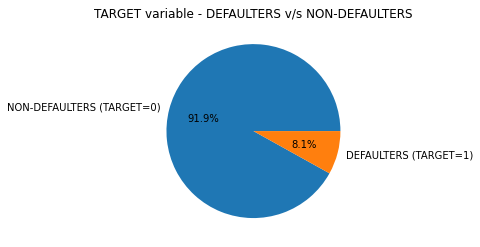

In [28]:
# Plotting Pie-chart for Target Variable
## autopct argument - to show percentage values in Pie Chart

plt.pie(ApplicationData.TARGET.value_counts(normalize=True), labels=['NON-DEFAULTERS (TARGET=0)','DEFAULTERS (TARGET=1)'], autopct='%1.1f%%')
plt.title("TARGET variable - DEFAULTERS v/s NON-DEFAULTERS")
plt.show()

**From above details, we can derive that there is a huge imbalance between Defaulters and Non-Defaulters. Defaulters are of only 8.1% whereas Non-defaulters are of 91.9%**

For upcoming analysis, we would divide/segment data with respect to 'TARGET' variable and derive insights

In [29]:
## Dividing data on TARGET variable

Target_0 = ApplicationData[ApplicationData.TARGET==0]
Target_1 = ApplicationData[ApplicationData.TARGET==1]

In [30]:
## Checking Size of data derived
print('Target 0 : ',Target_0.shape)
print('Target 1 : ',Target_1.shape)

Target 0 :  (282686, 73)
Target 1 :  (24825, 73)


### Task 3.2 : Dividing variables based on their type

In [31]:
# Checking categorical columns

cat_colns = list(set(ApplicationData.columns) - set(ApplicationData.describe().columns))
cat_colns

['NAME_FAMILY_STATUS',
 'ORGANIZATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'FLAG_OWN_CAR',
 'CODE_GENDER',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_CONTRACT_TYPE',
 'OCCUPATION_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_HOUSING_TYPE',
 'NAME_INCOME_TYPE']

In [32]:
# Checking number of categorical columns

len(cat_colns)

12

In [33]:
# Checking numerical columns

num_colns = list(ApplicationData.describe().columns)
num_colns

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMEN

In [34]:
# Checking number of numerical columns

len(num_colns)

61

### Task 3.3 : Univariate Analysis and checking TARGET v/s Categorical Variables

In [35]:
# Defining a function to plot different charts for Categorical Variables

def plot_chart_cat(ApplicationData, Target_0, Target_1, column):
    
    ApplicationData = ApplicationData
    Target_0 = Target_0
    Target_1 = Target_1
    col = column
    
    fig = plt.figure(figsize=(15,10))
    
    ax1 = plt.subplot(221)
    ApplicationData[col].value_counts().plot.pie(autopct = "%1.0f%%", ax=ax1)
    plt.title('Plotting data for the column: '+ column)
    
    ax2 = plt.subplot(222)
    sns.countplot(x= column, hue = 'TARGET', data = ApplicationData, ax = ax2)
    plt.xticks(rotation=90)
    plt.title('Plotting data for TARGET in terms of Total Count')


    ax3 = plt.subplot(223)
    df = pd.DataFrame()
    df['0']= ((Target_0[col].value_counts())/len(Target_0))
    df['1']= ((Target_1[col].value_counts())/len(Target_1))
    df.plot.bar(ax=ax3)
    plt.title('Plotting data for TARGET in terms of Percentage')


    fig.tight_layout()

    plt.show()

Plotting graphs for NAME_FAMILY_STATUS


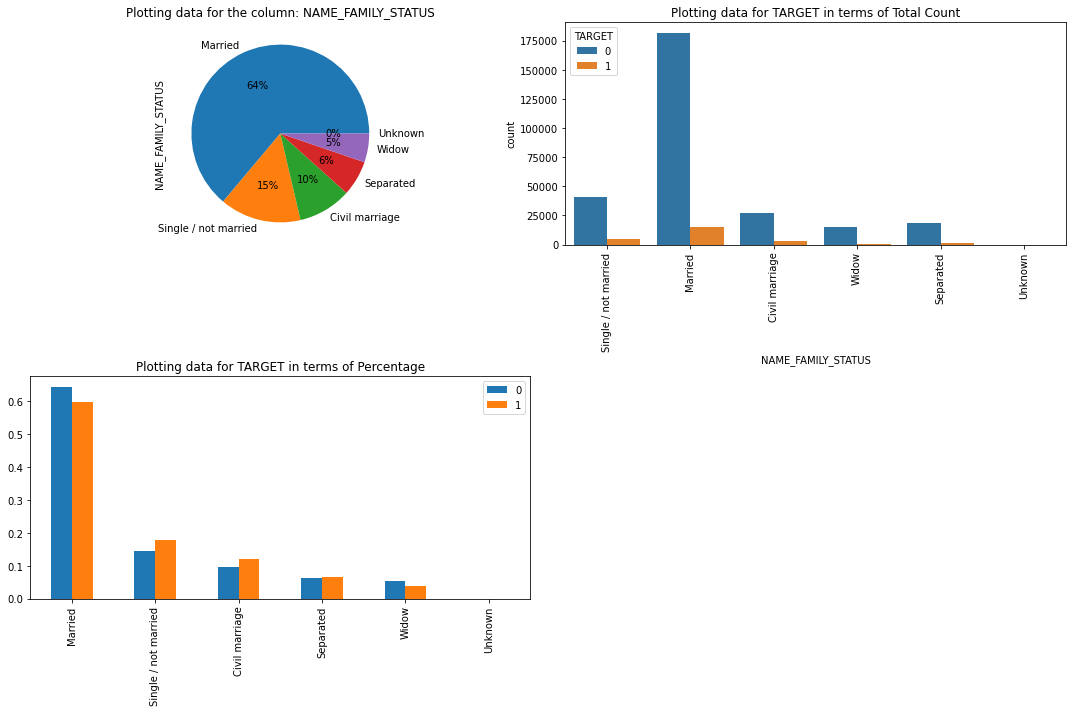



Plotting graphs for ORGANIZATION_TYPE


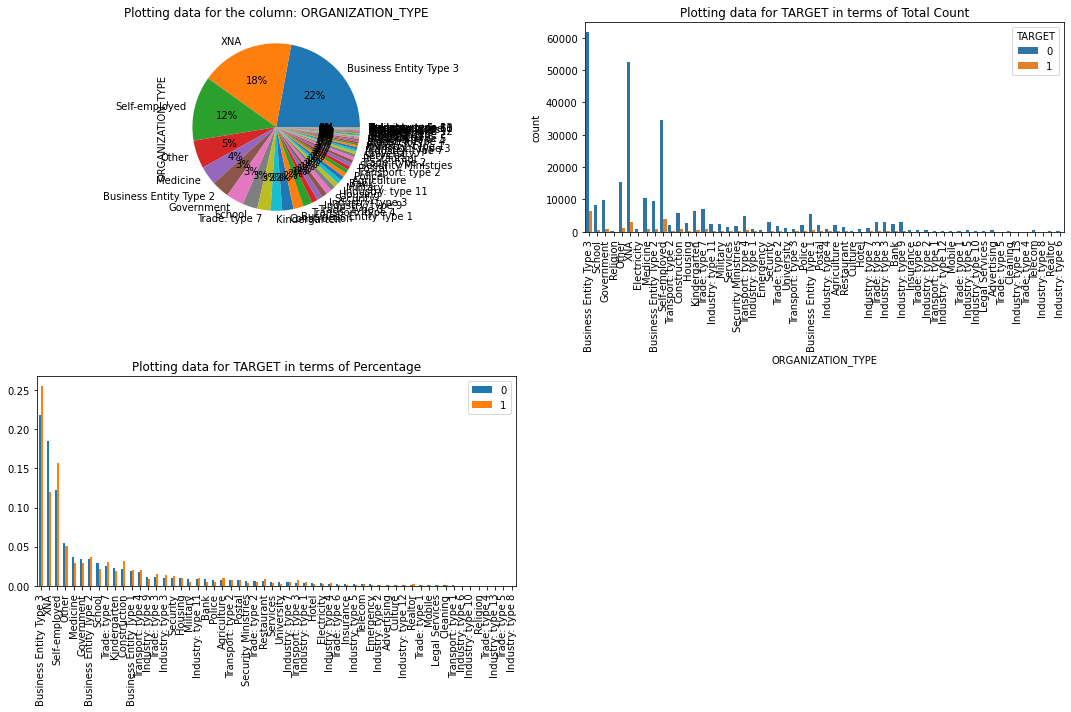



Plotting graphs for WEEKDAY_APPR_PROCESS_START


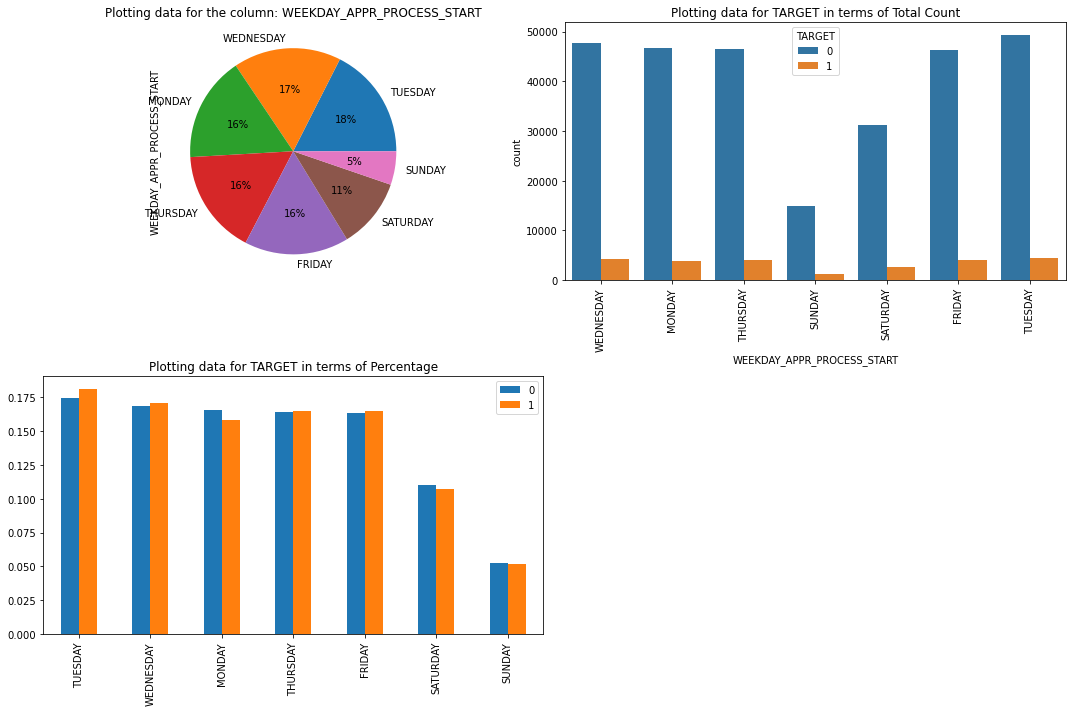



Plotting graphs for FLAG_OWN_CAR


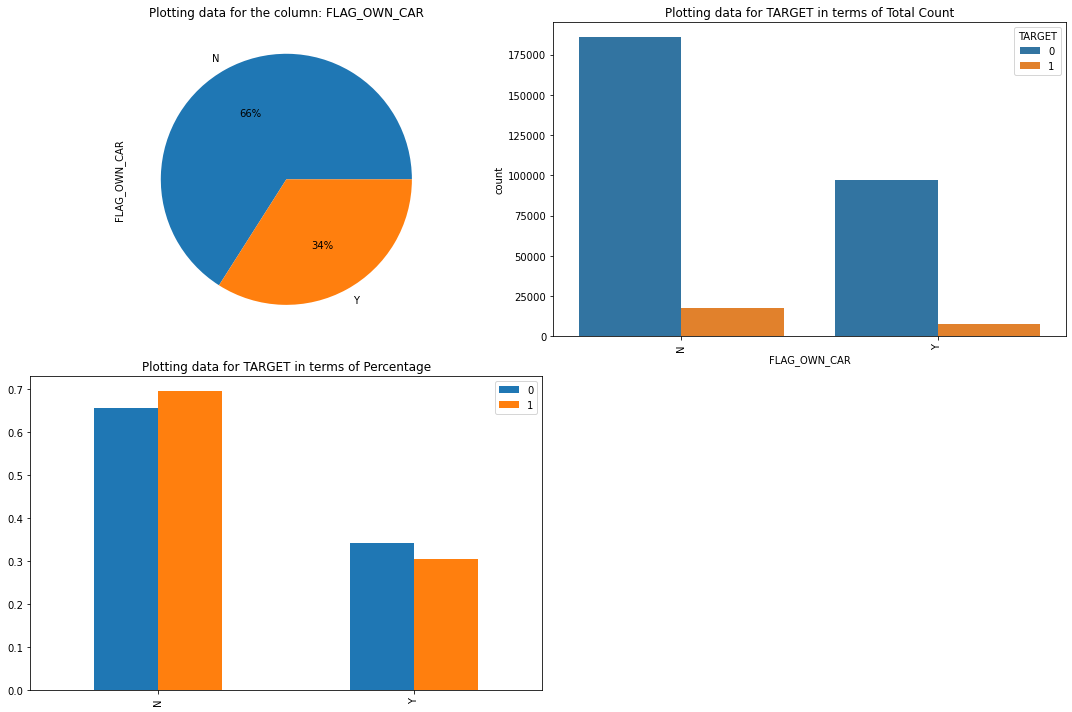



Plotting graphs for CODE_GENDER


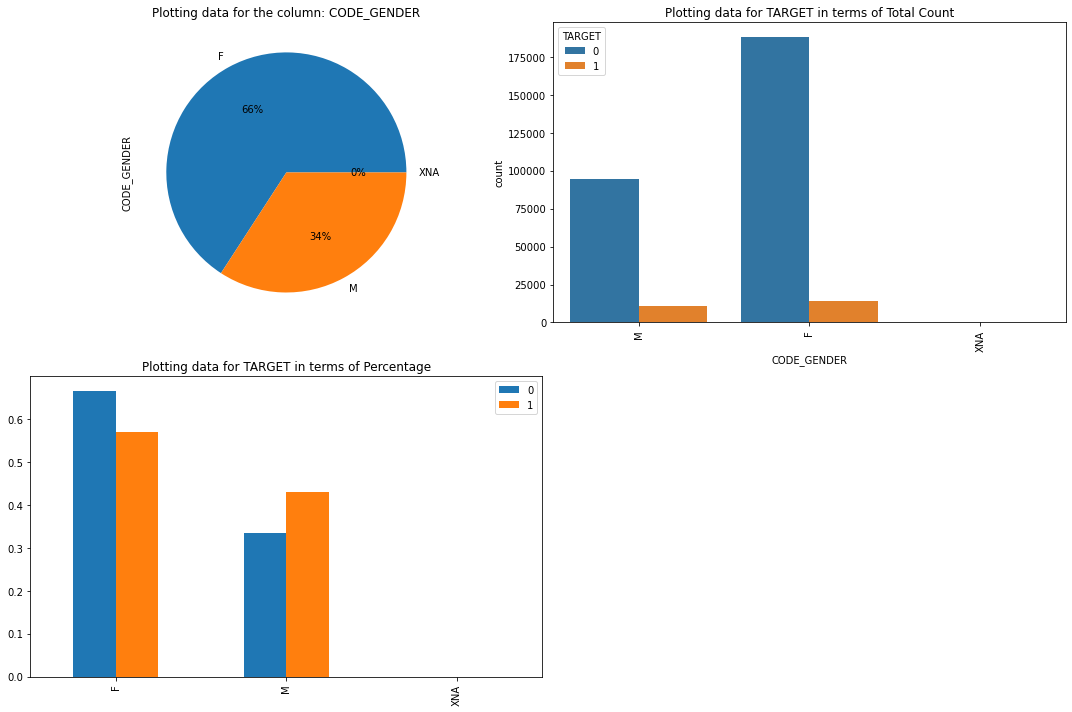



Plotting graphs for FLAG_OWN_REALTY


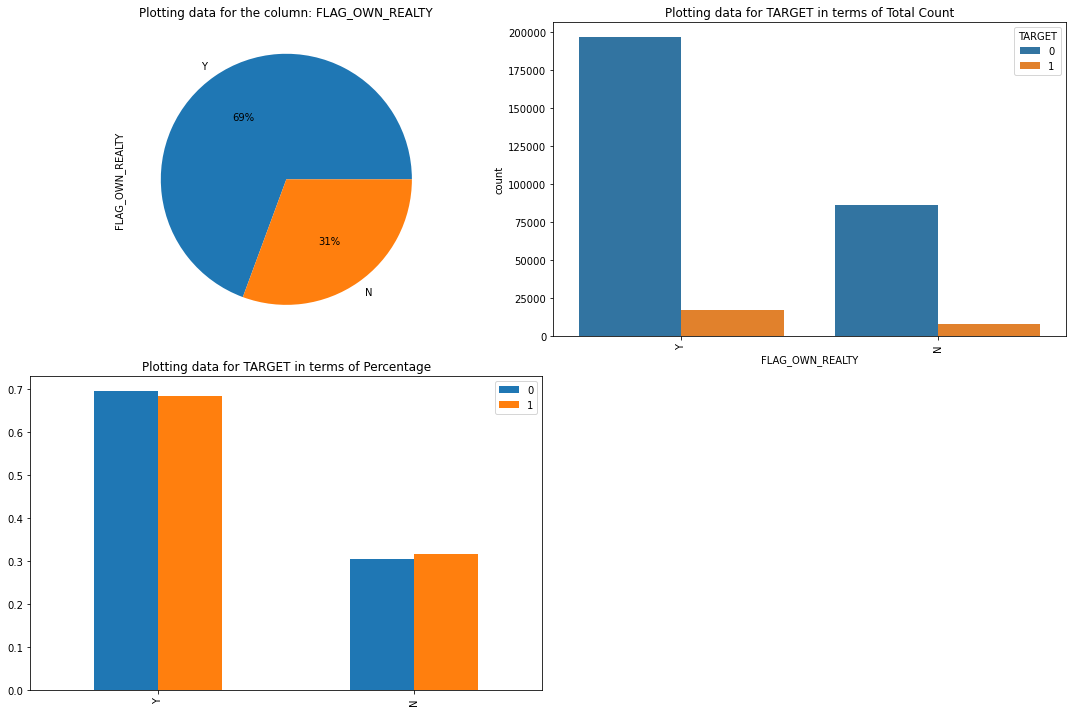



Plotting graphs for NAME_TYPE_SUITE


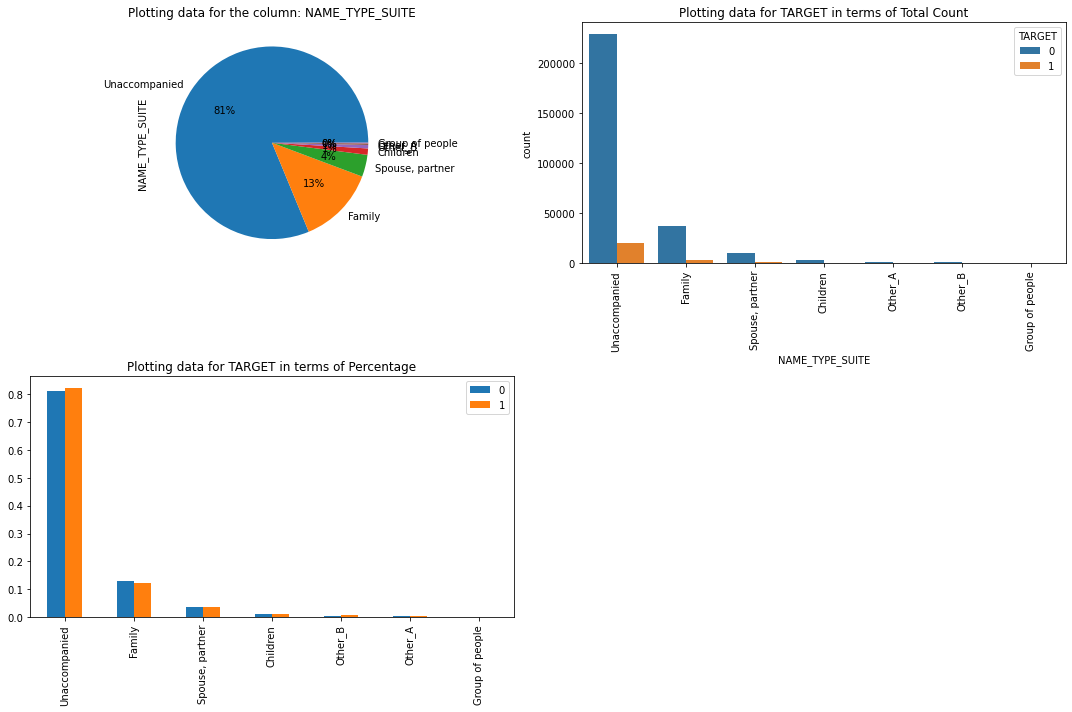



Plotting graphs for NAME_CONTRACT_TYPE


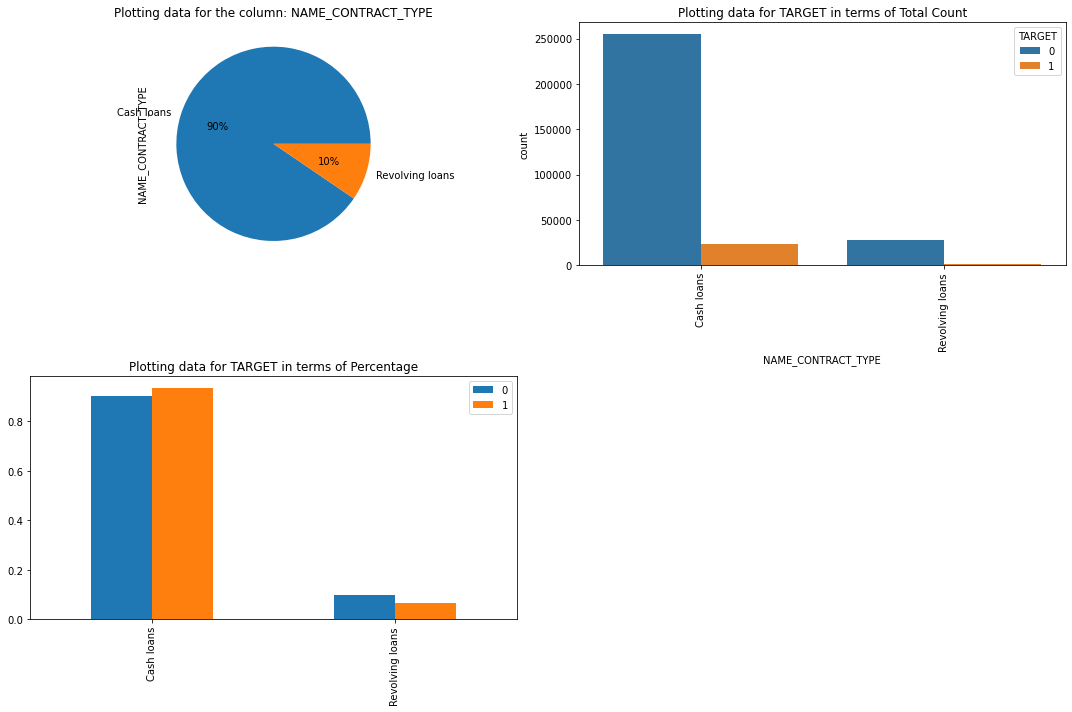



Plotting graphs for OCCUPATION_TYPE


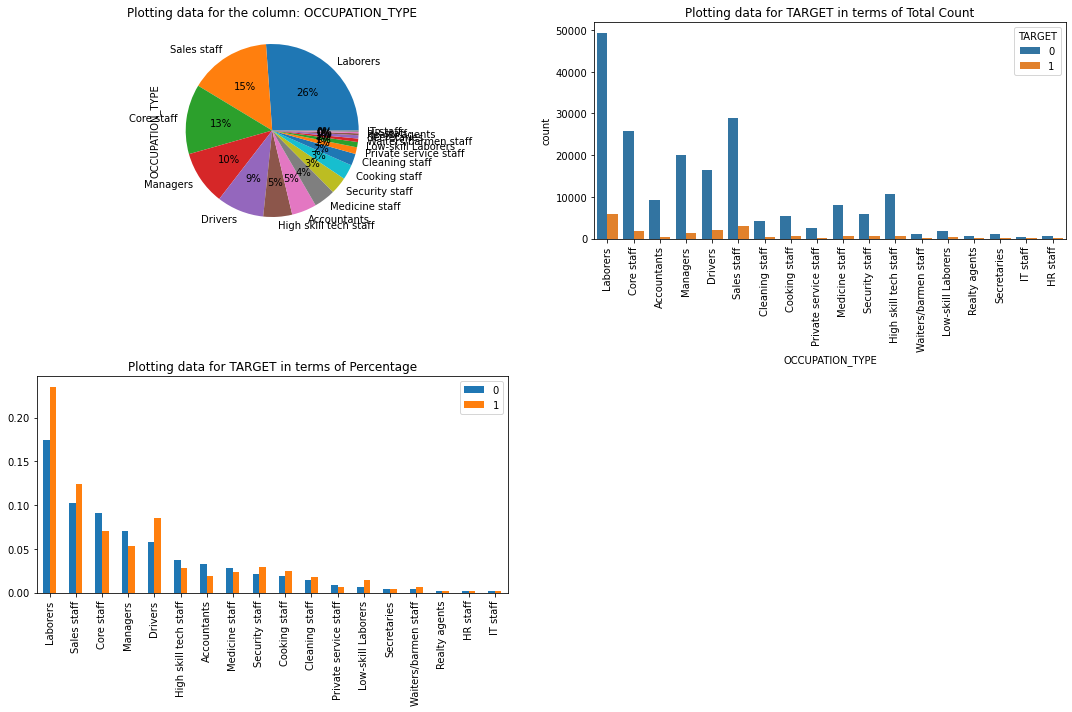



Plotting graphs for NAME_EDUCATION_TYPE


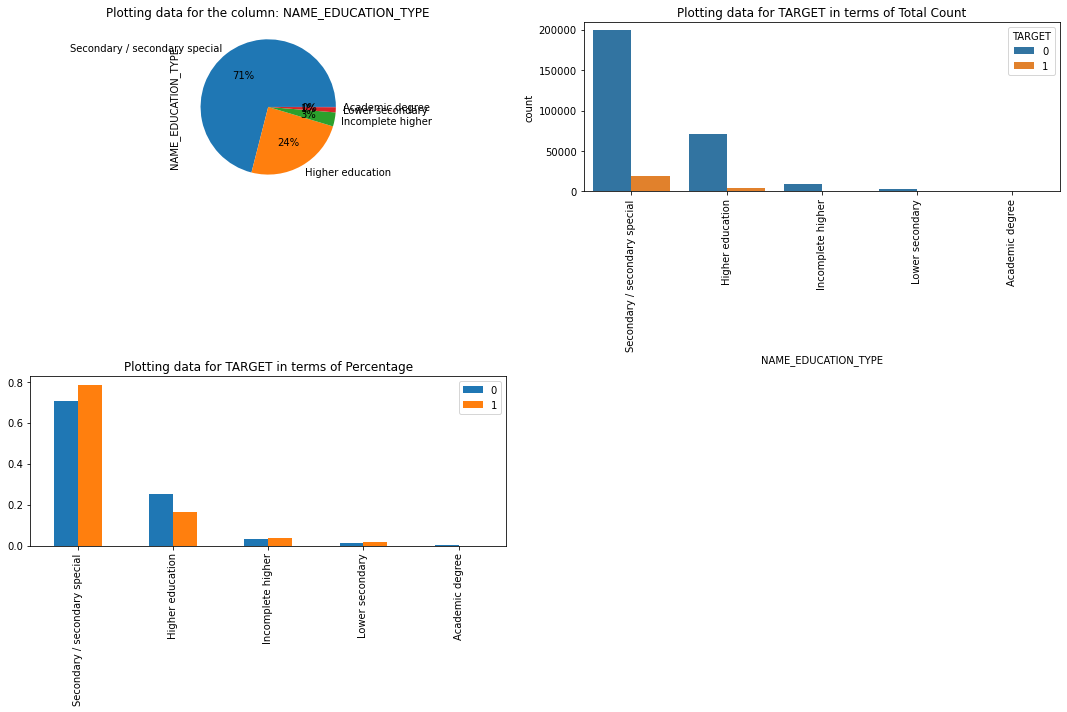



Plotting graphs for NAME_HOUSING_TYPE


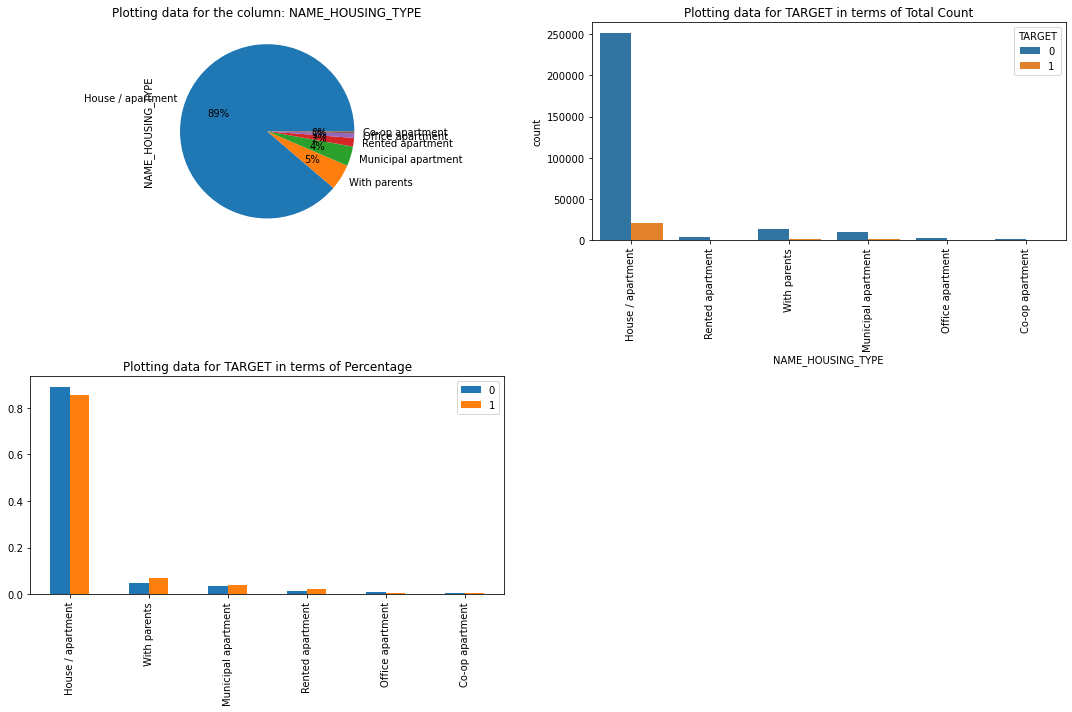



Plotting graphs for NAME_INCOME_TYPE


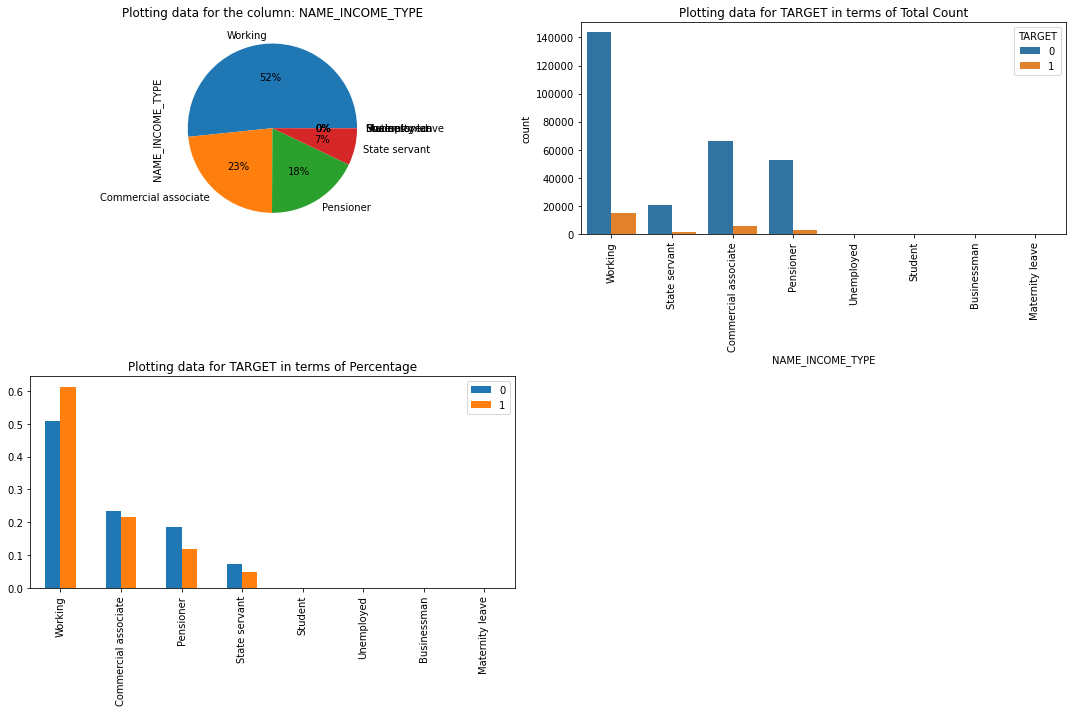

In [36]:
# Looping columns & pass them to function to plot various charts

for column in cat_colns:
    print("Plotting graphs for "+column)
    plot_chart_cat(ApplicationData, Target_0, Target_1, column)
    print("\n========================================================================================================\n")

**Insights from above graphs :**

1. Most of the Defaulters are among Laborers, who are also the highest applicants of loan among other Occupation categories
2. Those who don't have a car defaulted the loan more than who have a car
3. Most of the applicants reside in House/apartment
4. Females have applied and also defaulted more compared to Men
5. Most of the applications and defaulters have education level of 'Secondary / secondary special'
6. Defaulting/Non-defaulting doesn't have effect on customer owing a house or not.
7. Those who are Unaccompanied while applying loan have defaulted more in percentage

### Task 3.4 : Univariate Analysis and checking TARGET v/s Numerical Variables

In [37]:
# Defining a function to plot different charts for Numerical Variables

def plot_chart_cont(ApplicationData, Target_0, Target_1, column):
    
    ApplicationData = ApplicationData
    Target_0 = Target_0
    Target_1 = Target_1
    col = column
    
    fig = plt.figure(figsize=(15,10))
    
    ax1 = plt.subplot(221)
    sns.distplot(ApplicationData[col], ax=ax1)
    plt.title('Plotting data for the column: '+ column)
    
    ax2 = plt.subplot(222)
    sns.barplot(x='TARGET', y=col, data=ApplicationData, estimator=np.sum, ci=None, ax=ax2)
    plt.title('Plotting data for TARGET in terms of Total Count')


    ax3 = plt.subplot(223)
    sns.barplot(x='TARGET', y=col, data=ApplicationData, estimator=np.mean, ci=None, ax=ax3)
    plt.title('Plotting data for TARGET in terms of Mean')


    fig.tight_layout()

    plt.show()

In [38]:
# Checking numerical columns
num_colns

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMEN

Plotting graphs for AMT_INCOME_TOTAL


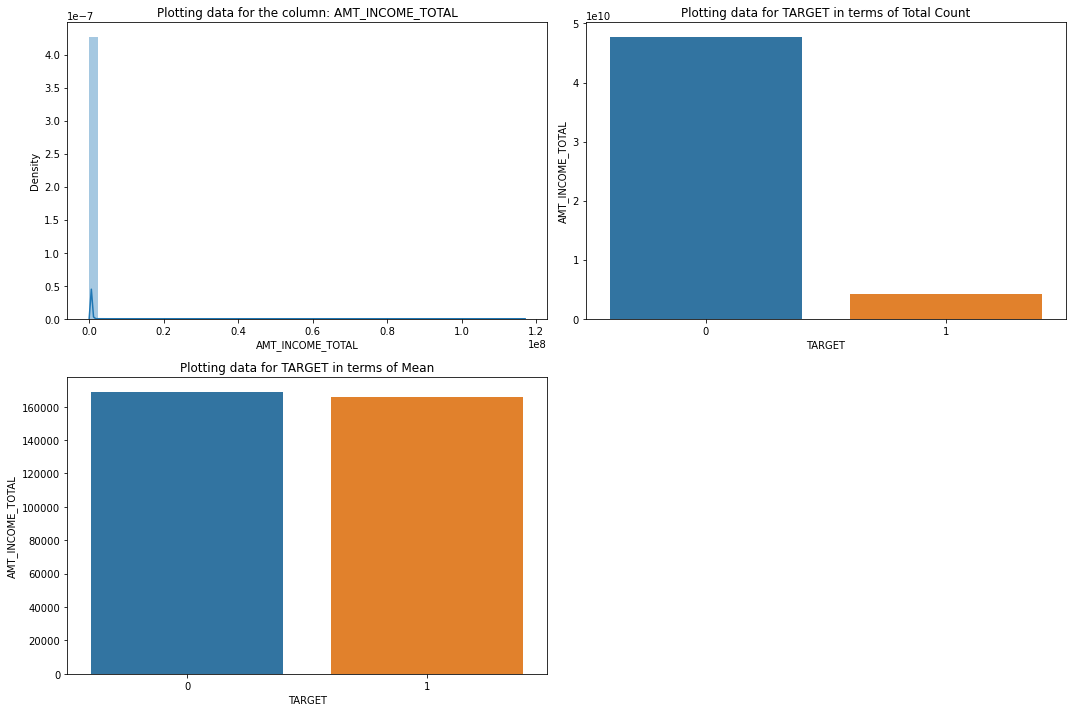



Plotting graphs for AMT_CREDIT


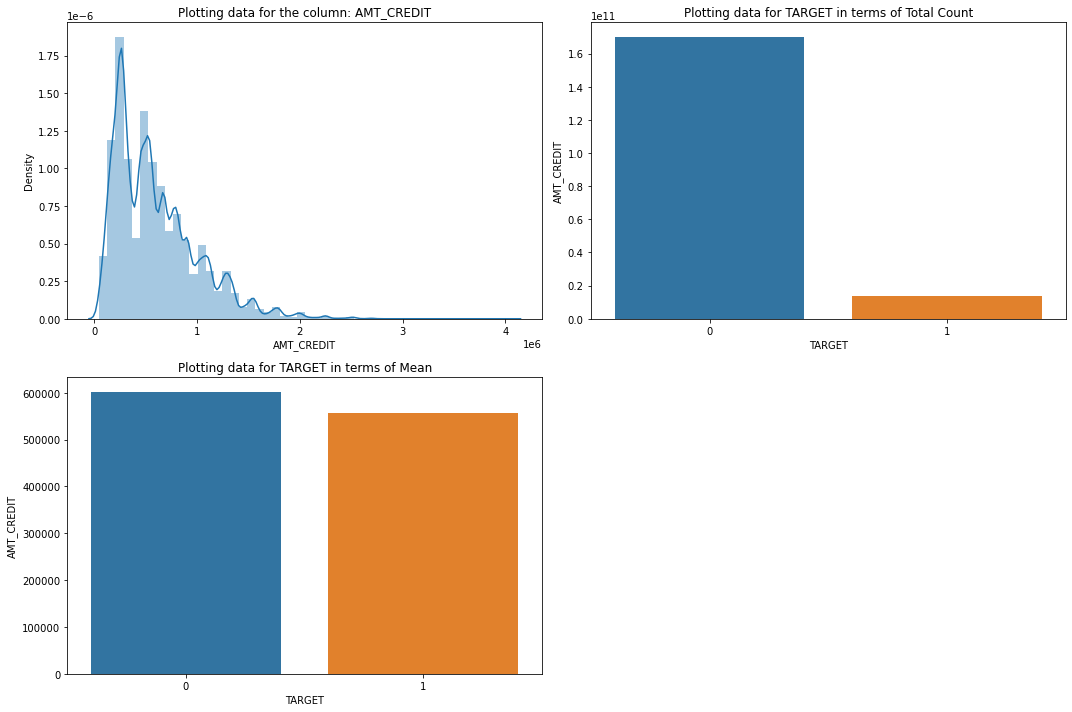



Plotting graphs for AMT_ANNUITY


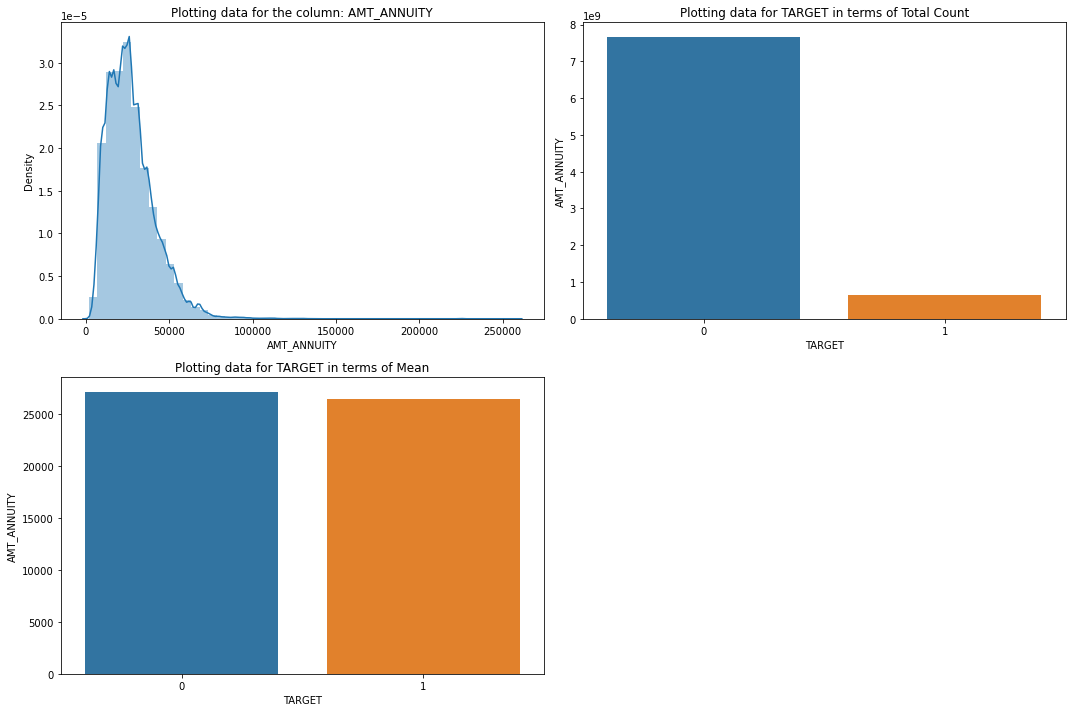



Plotting graphs for AMT_GOODS_PRICE


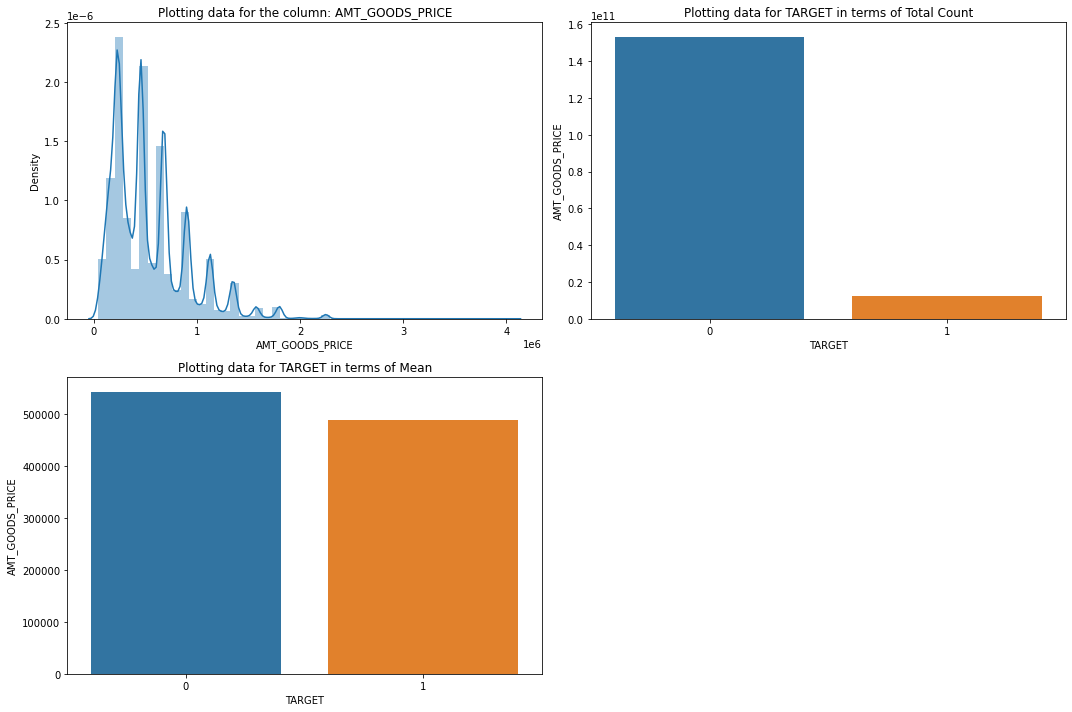



Plotting graphs for CNT_CHILDREN


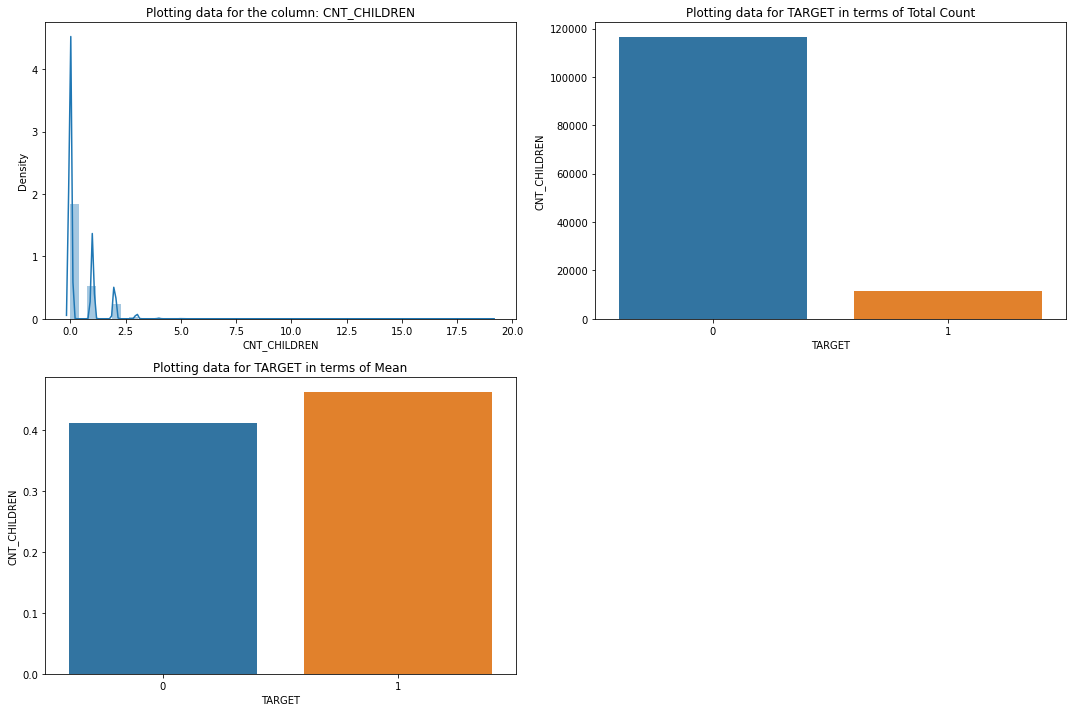



Plotting graphs for CNT_FAM_MEMBERS


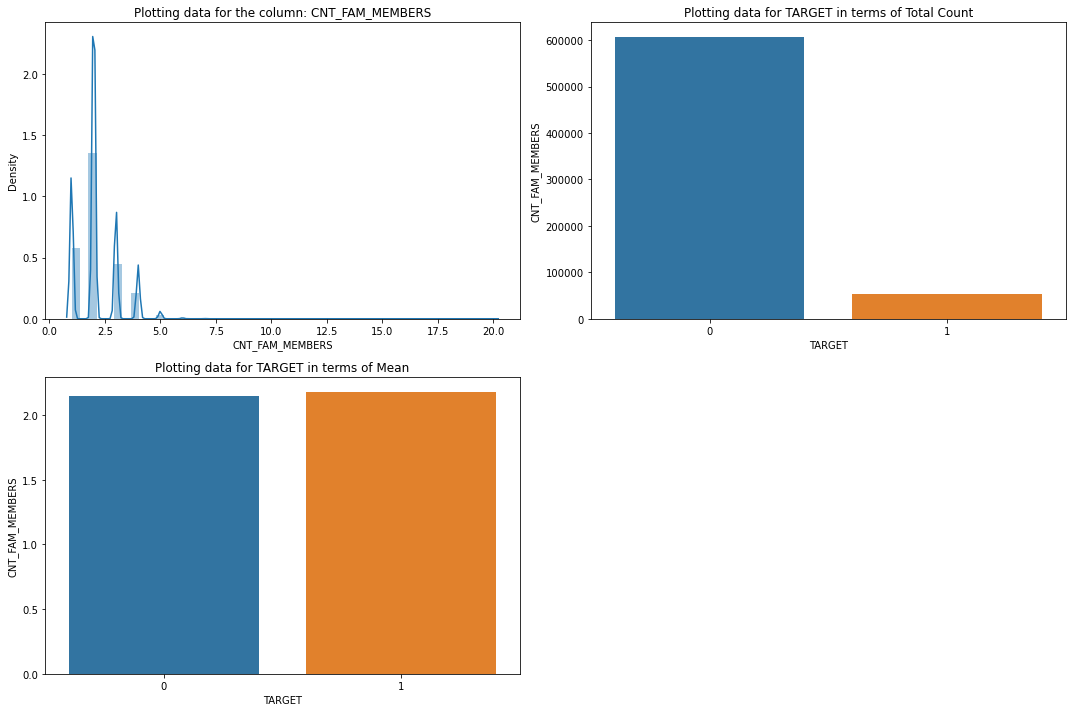

In [39]:
# Listing few columns & pass them to function to plot various charts

num_colns_1 = ['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'CNT_CHILDREN',
 'CNT_FAM_MEMBERS']

for column in num_colns_1:
    print("Plotting graphs for "+column)
    plot_chart_cont(ApplicationData, Target_0, Target_1, column)
    print("\n========================================================================================================\n")

**Insights from above graphs :**

1. Average salary of Defaulters and Non-Defaulters is approximately equal
2. Average value of no.of children is high for Defaulters when compared with Non-Defaulters

Plotting graphs for DAYS_EMPLOYED


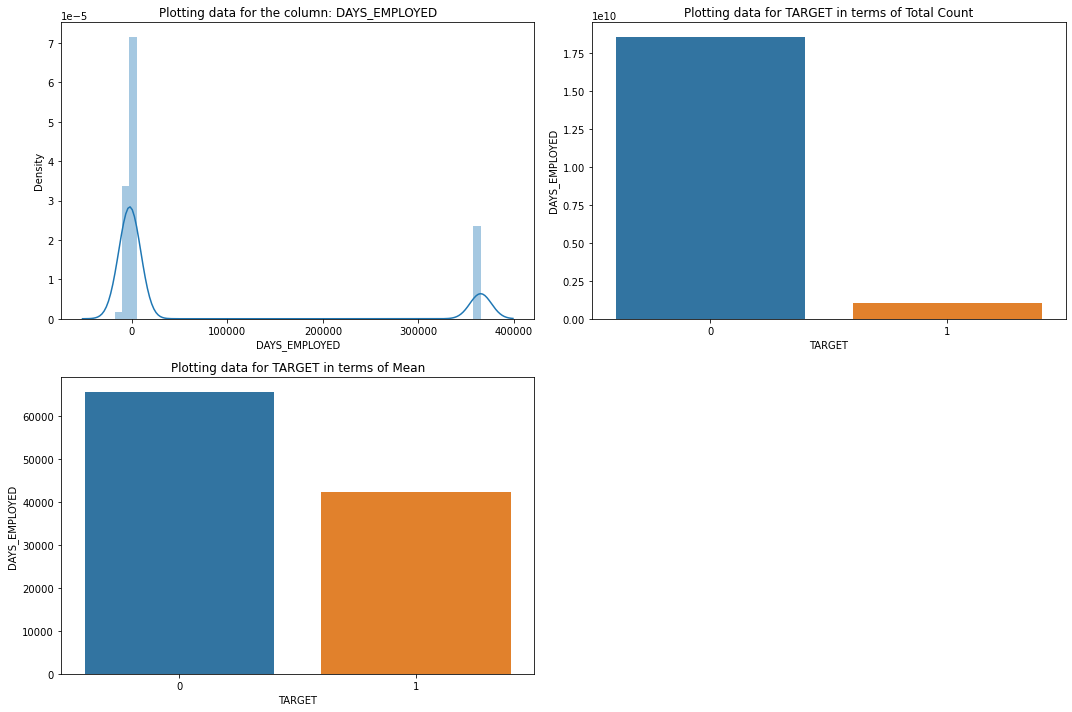



Plotting graphs for DAYS_REGISTRATION


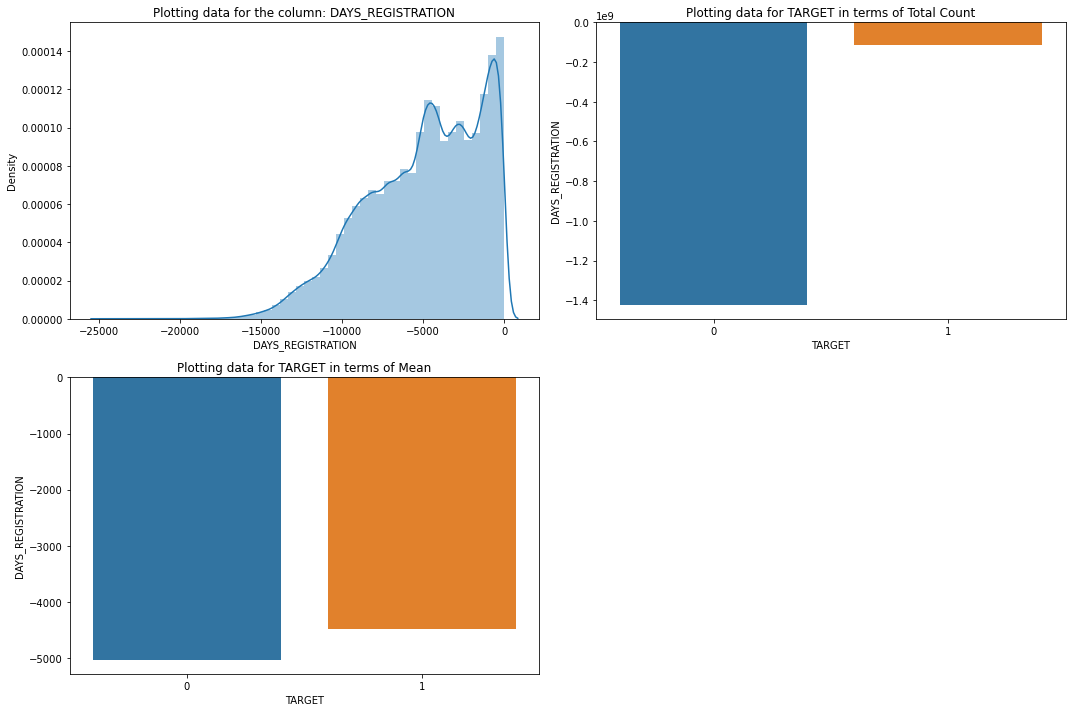



Plotting graphs for DAYS_ID_PUBLISH


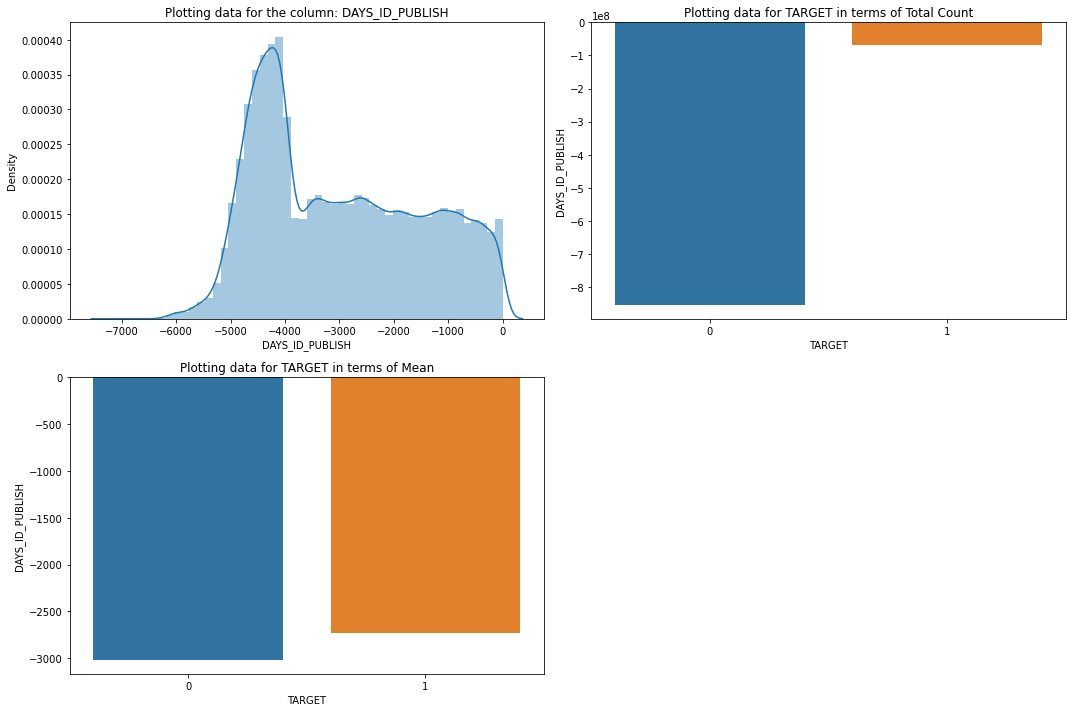



Plotting graphs for DAYS_LAST_PHONE_CHANGE


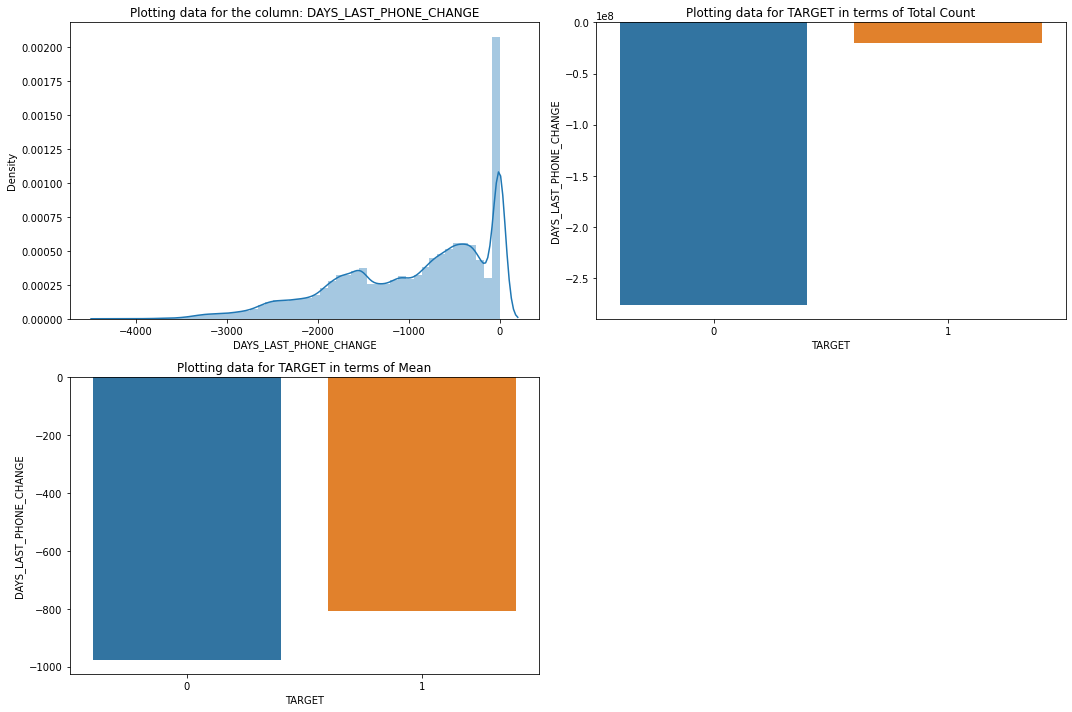

In [40]:
# Listing few columns & pass them to function to plot various charts

num_colns_2 = [ 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']
 
for column in num_colns_2:
    print("Plotting graphs for "+column)
    plot_chart_cont(ApplicationData, Target_0, Target_1, column)
    print("\n========================================================================================================\n")

Plotting graphs for FLAG_MOBIL


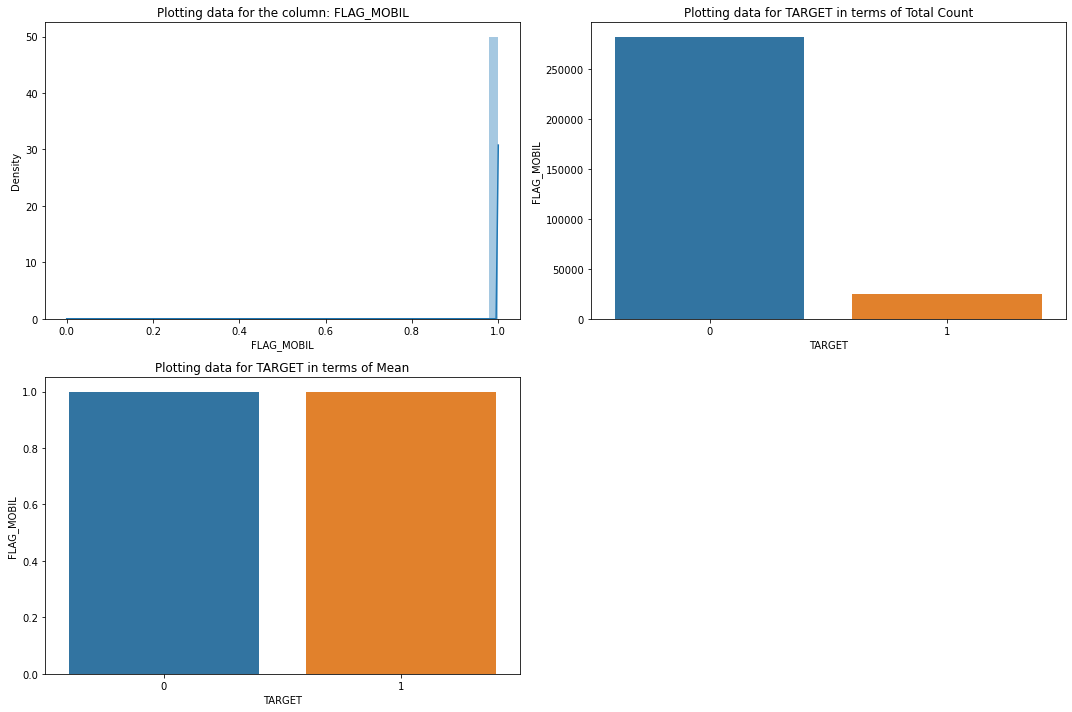



Plotting graphs for FLAG_EMP_PHONE


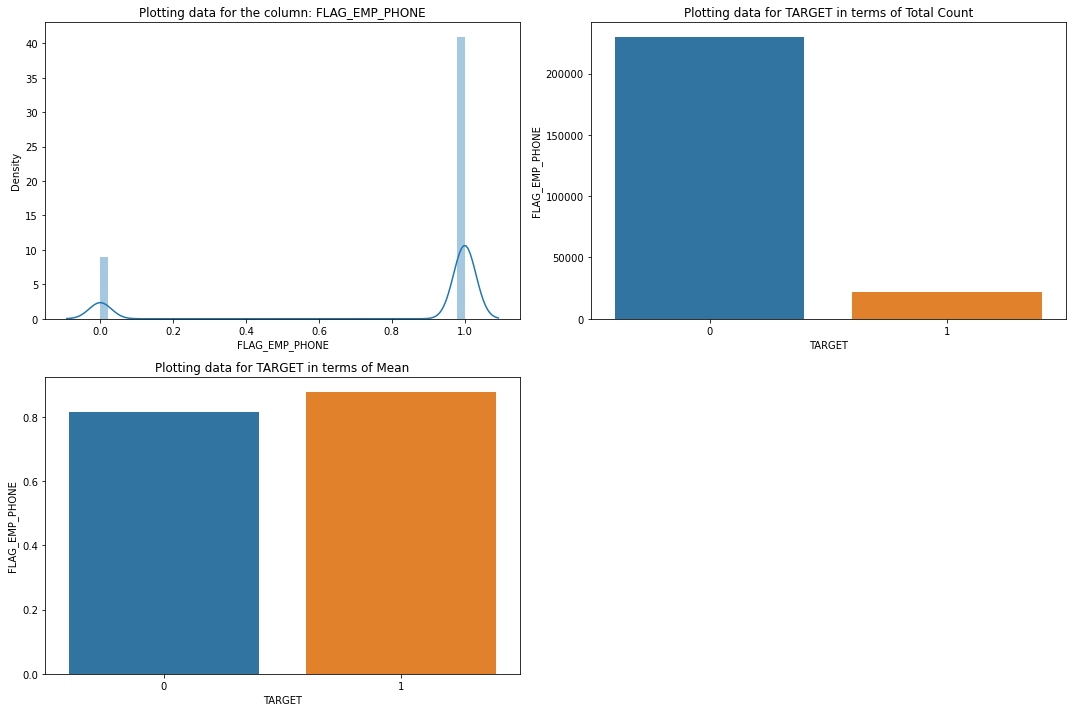



Plotting graphs for FLAG_WORK_PHONE


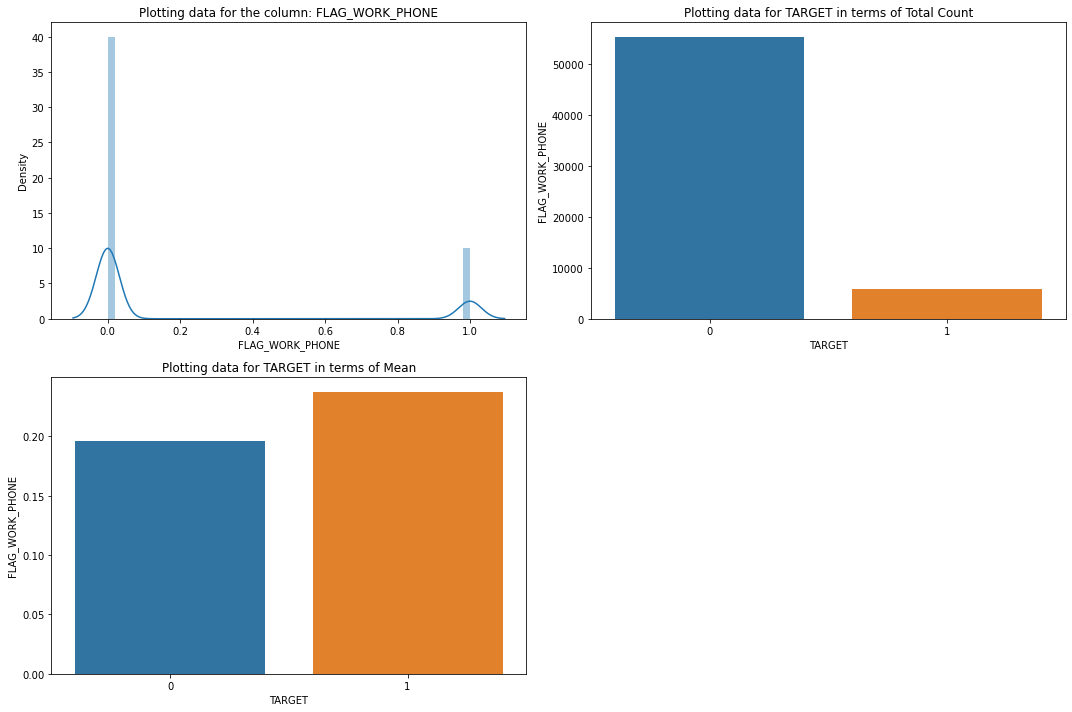



Plotting graphs for FLAG_CONT_MOBILE


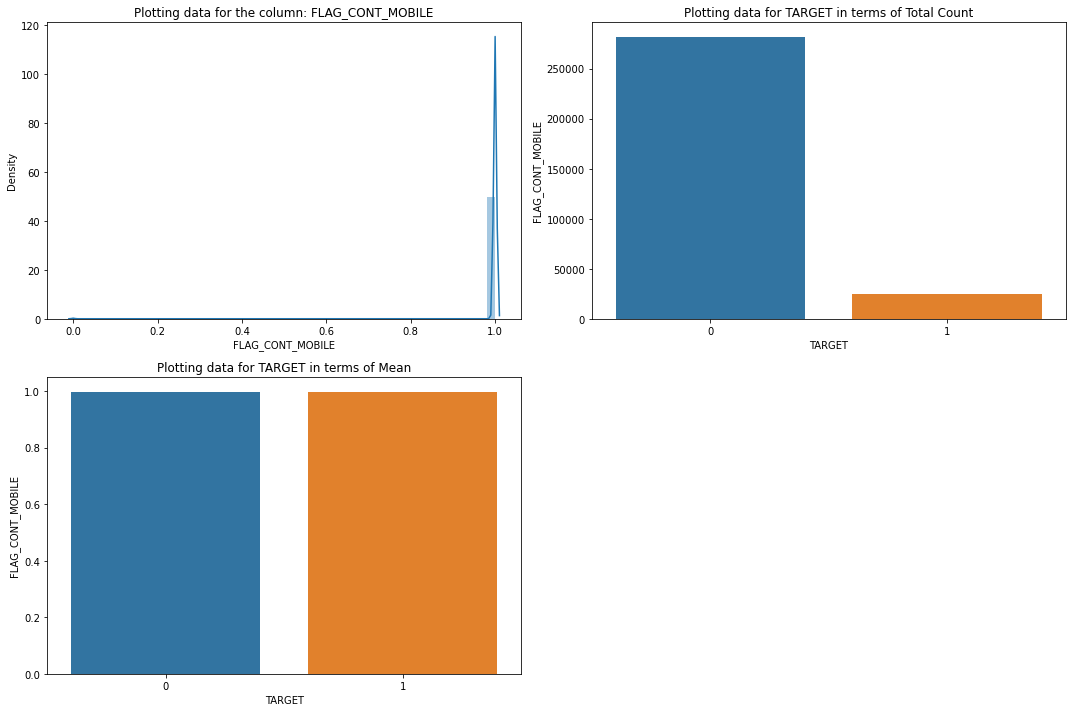



Plotting graphs for FLAG_PHONE


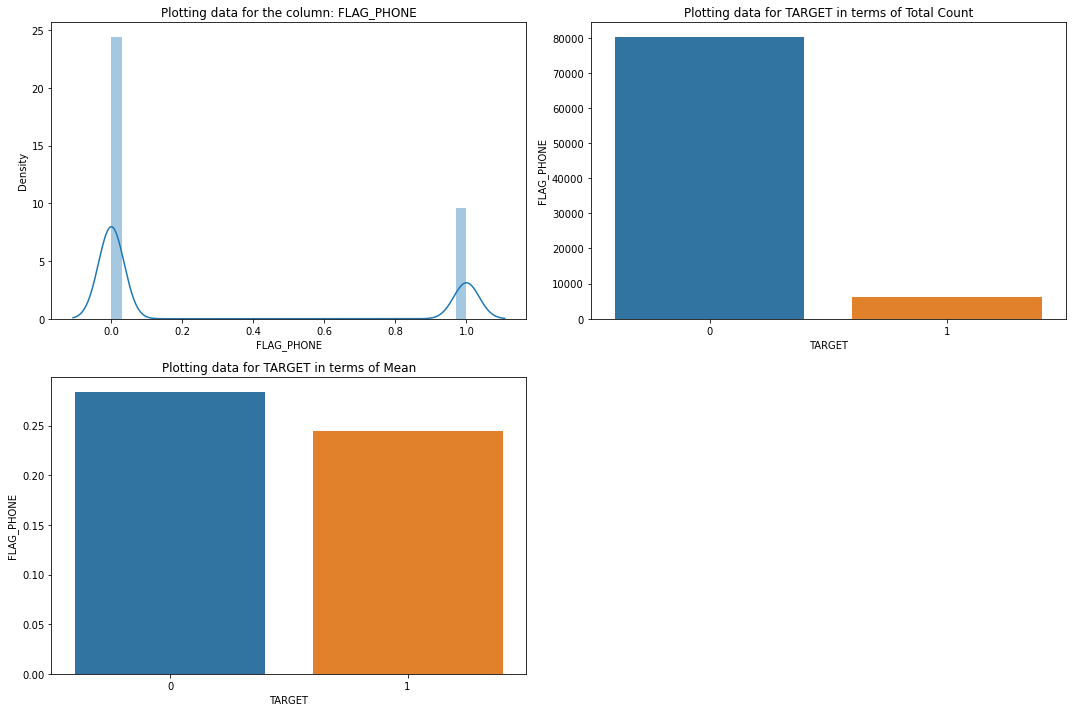



Plotting graphs for FLAG_EMAIL


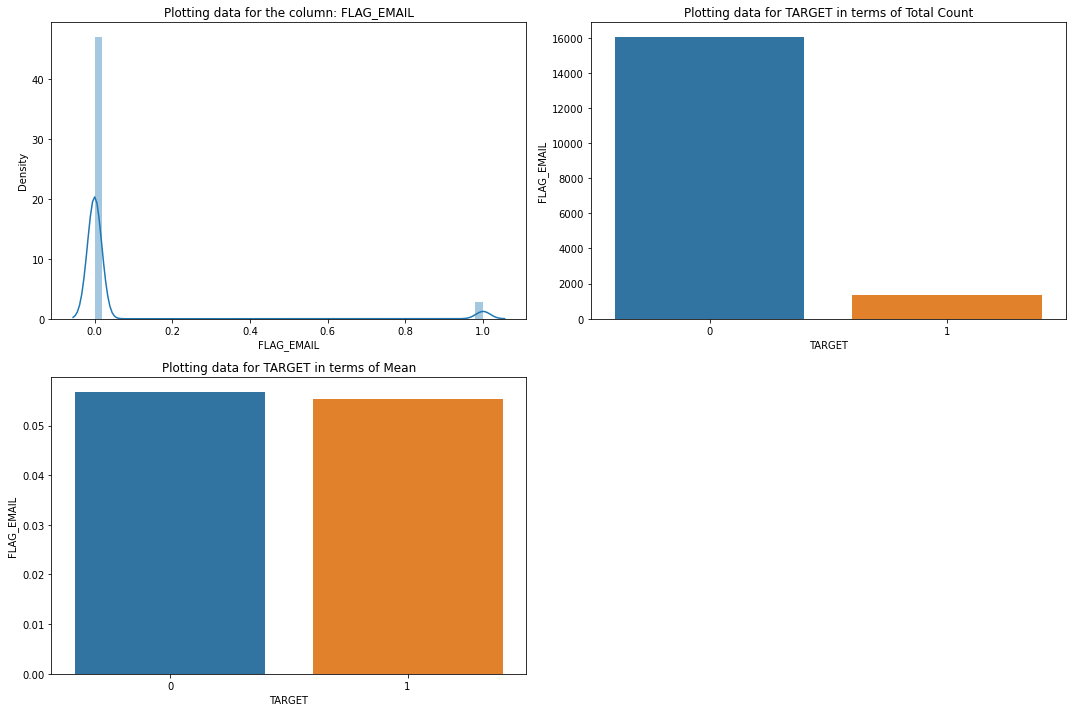

In [41]:
# Listing few columns & pass them to function to plot various charts
    
num_colns_3 = ['FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL']
    
for column in num_colns_3:
    print("Plotting graphs for "+column)
    plot_chart_cont(ApplicationData, Target_0, Target_1, column)
    print("\n========================================================================================================\n")

**Insights from above graphs :**

1. On an average, Defaulters have mostly provided their work phone and home phone numbers (FLAG_EMP_PHONE & FLAG_WORK_PHONE) than mobile phone number and email

Plotting graphs for REG_REGION_NOT_LIVE_REGION


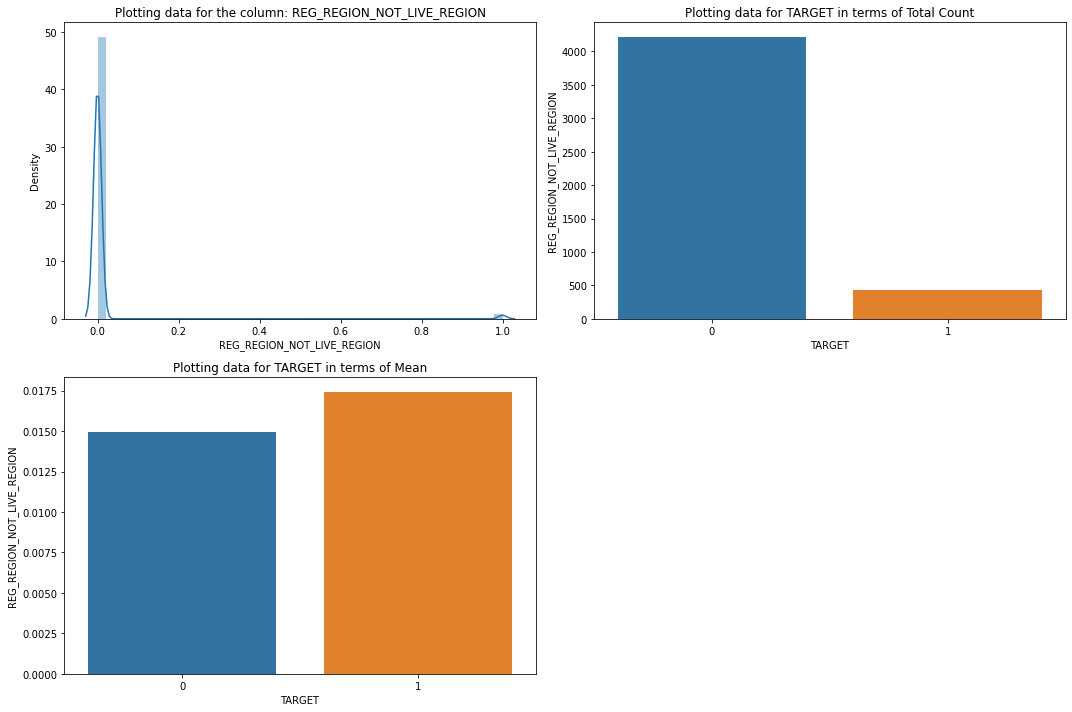



Plotting graphs for REG_REGION_NOT_WORK_REGION


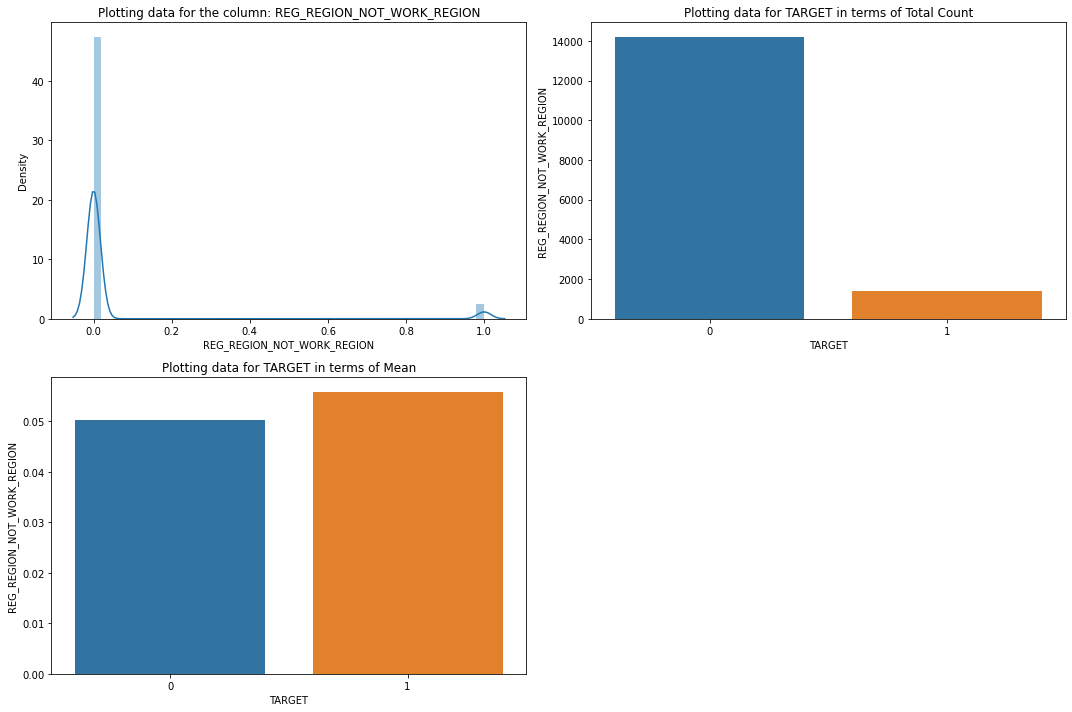



Plotting graphs for LIVE_REGION_NOT_WORK_REGION


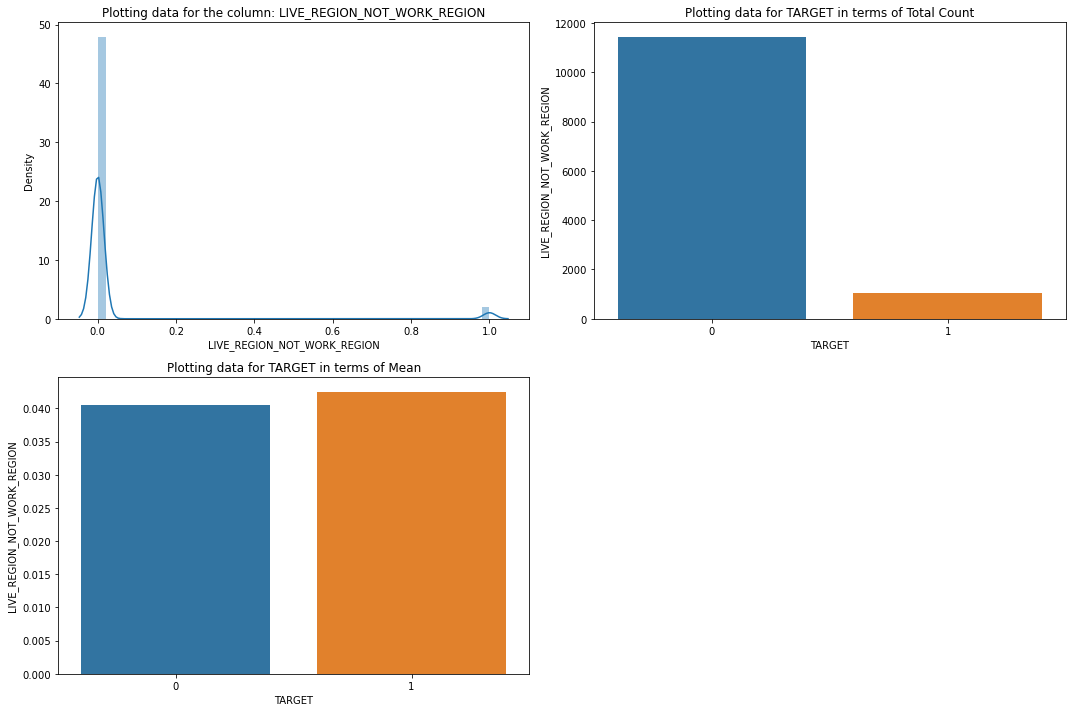



Plotting graphs for REG_CITY_NOT_LIVE_CITY


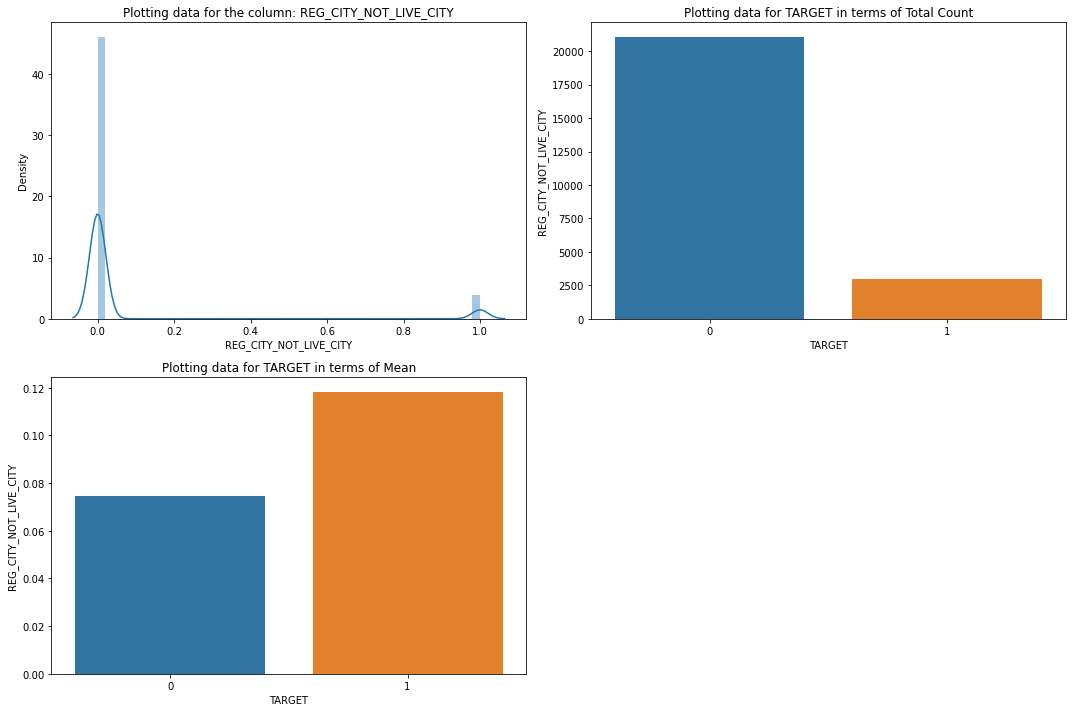



Plotting graphs for REG_CITY_NOT_WORK_CITY


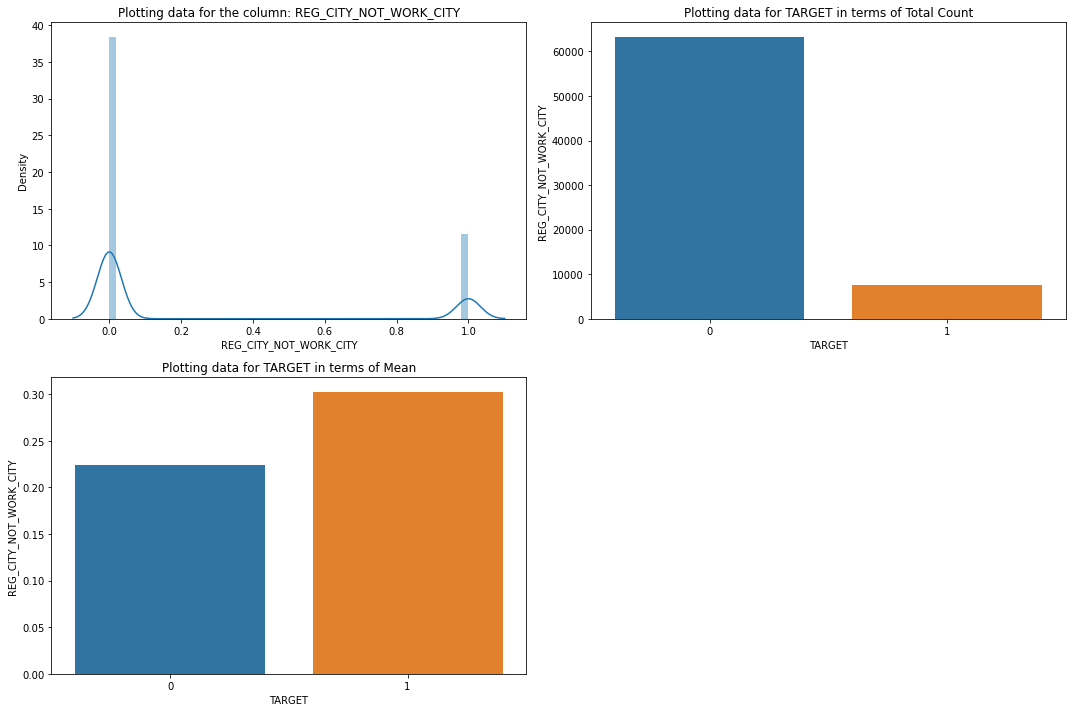



Plotting graphs for LIVE_CITY_NOT_WORK_CITY


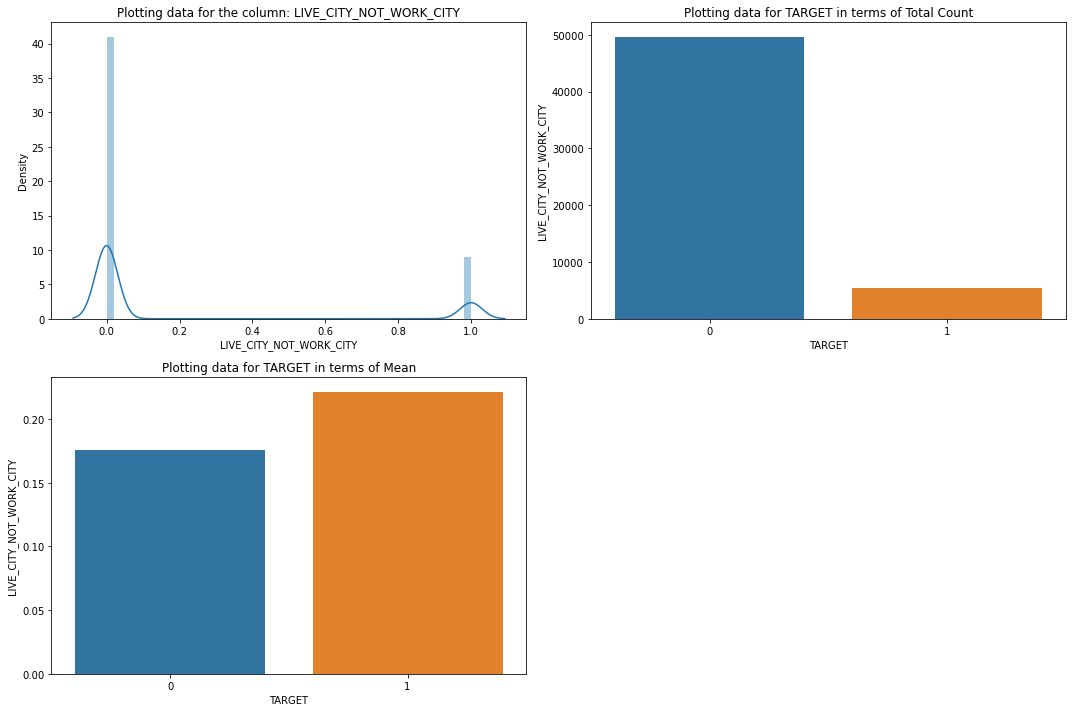



Plotting graphs for OBS_30_CNT_SOCIAL_CIRCLE


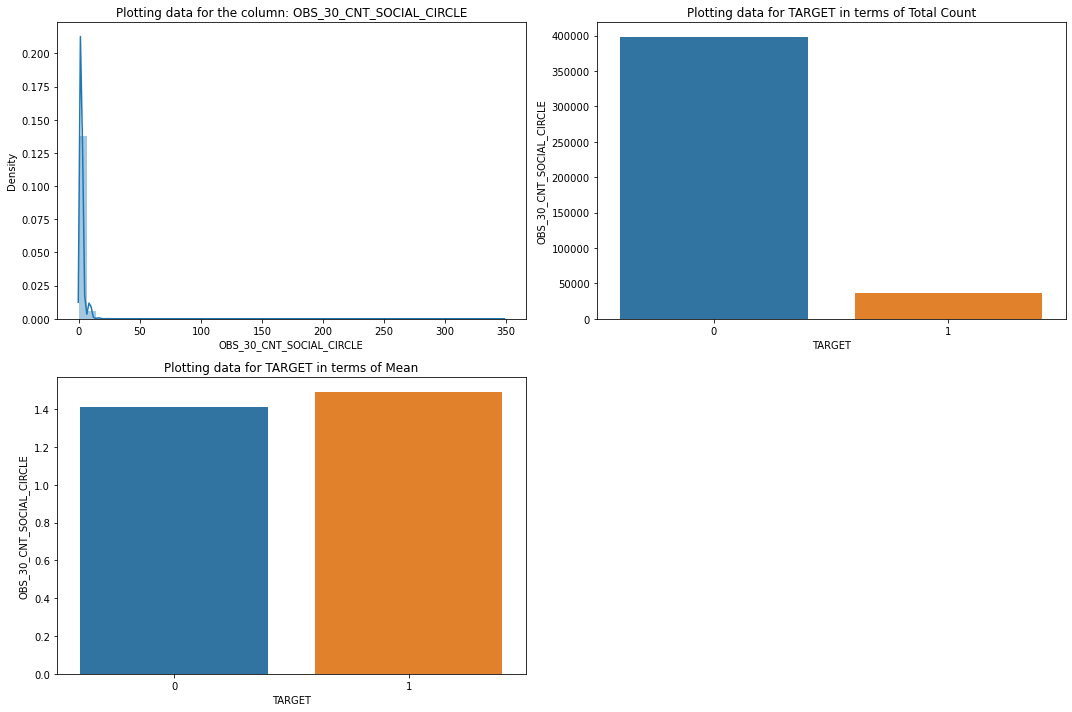



Plotting graphs for DEF_30_CNT_SOCIAL_CIRCLE


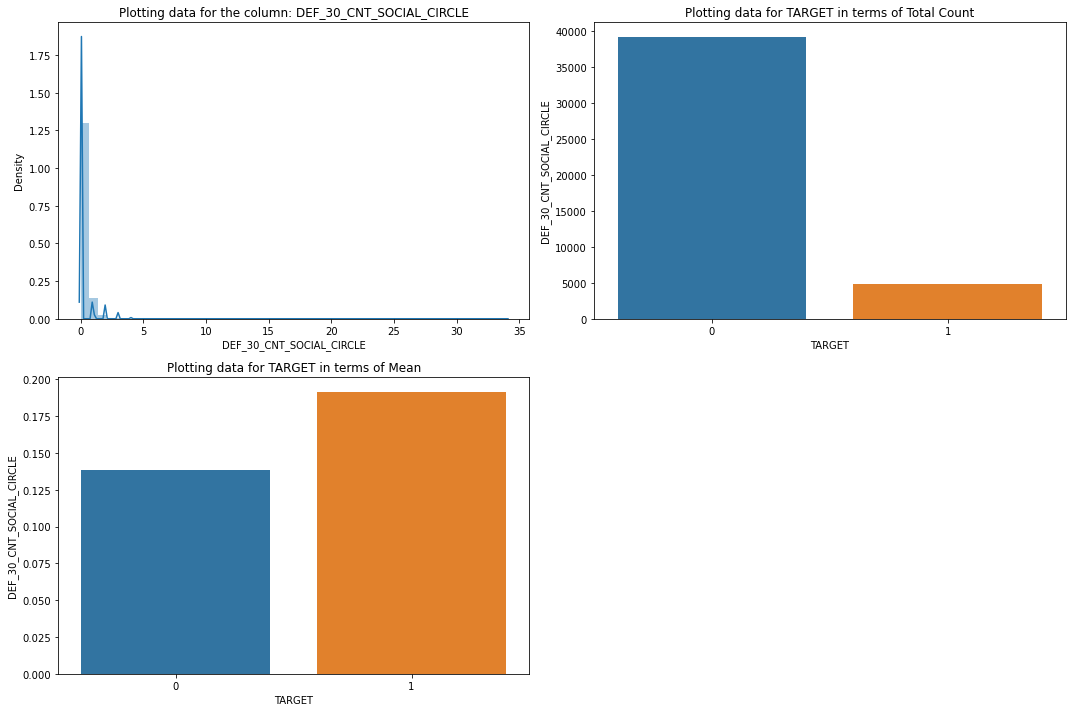



Plotting graphs for OBS_60_CNT_SOCIAL_CIRCLE


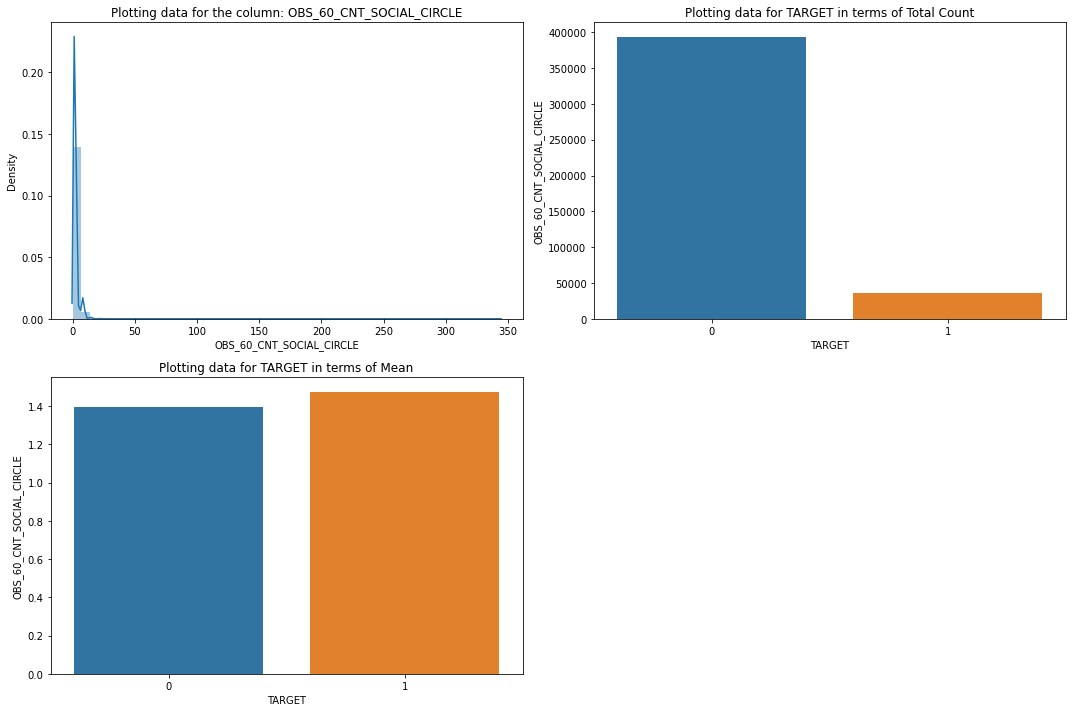



Plotting graphs for DEF_60_CNT_SOCIAL_CIRCLE


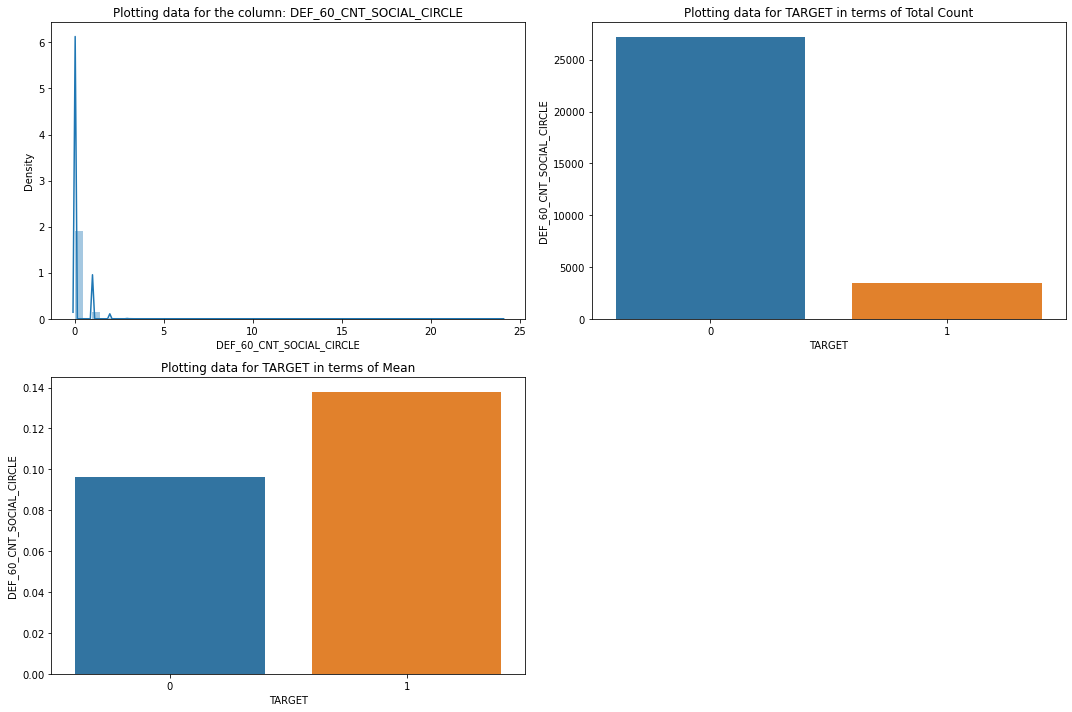

In [42]:
# Listing few columns & pass them to function to plot various charts

num_colns_4 = [ 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE']
    
for column in num_colns_4:
    print("Plotting graphs for "+column)
    plot_chart_cont(ApplicationData, Target_0, Target_1, column)
    print("\n========================================================================================================\n")

**Insights from above graphs :**

1. Most of the addresses (contact/permanent/work) provided by defaulters are not matching with each other (when compared to Non-Defaulters).

Plotting graphs for FLAG_DOCUMENT_2


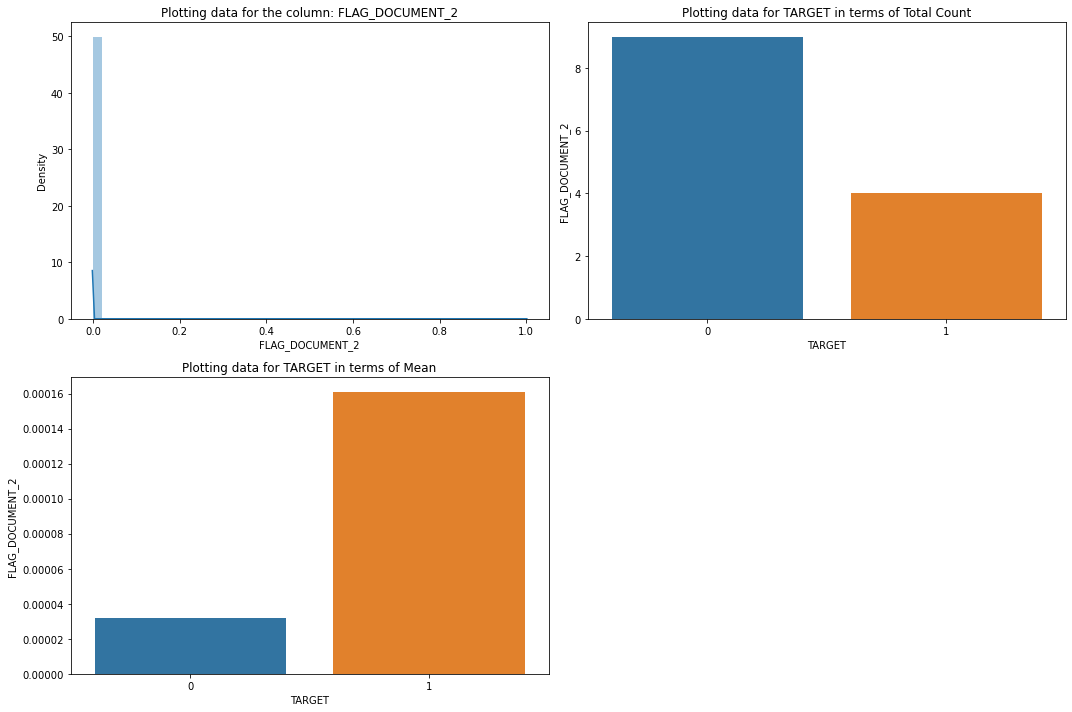



Plotting graphs for FLAG_DOCUMENT_3


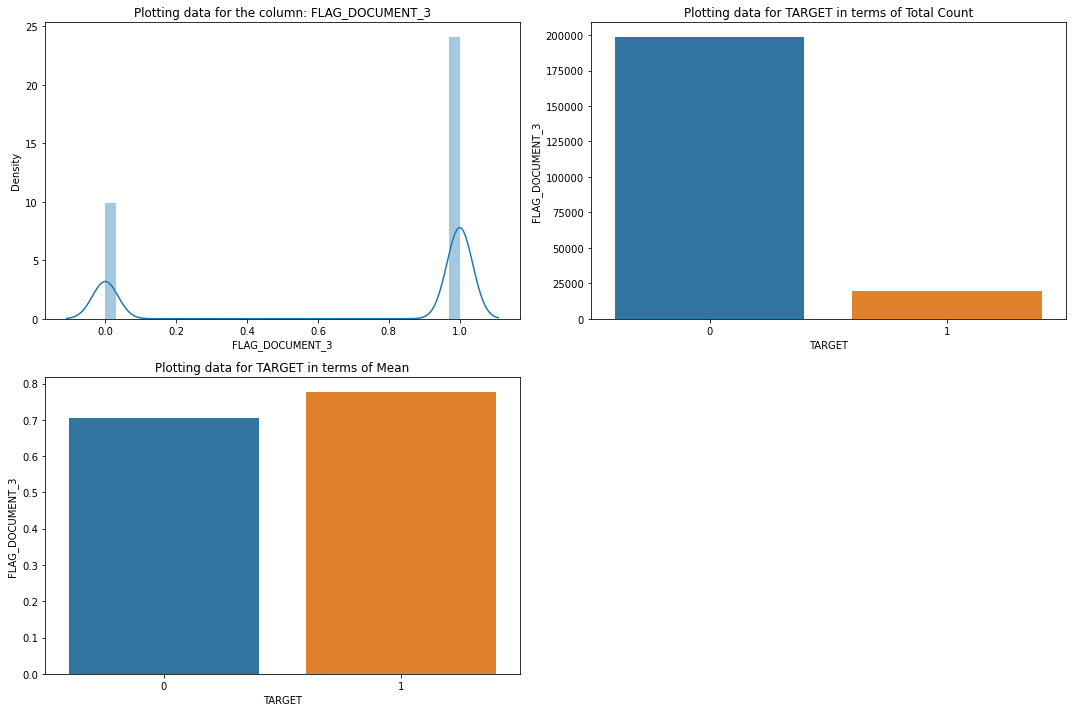



Plotting graphs for FLAG_DOCUMENT_4


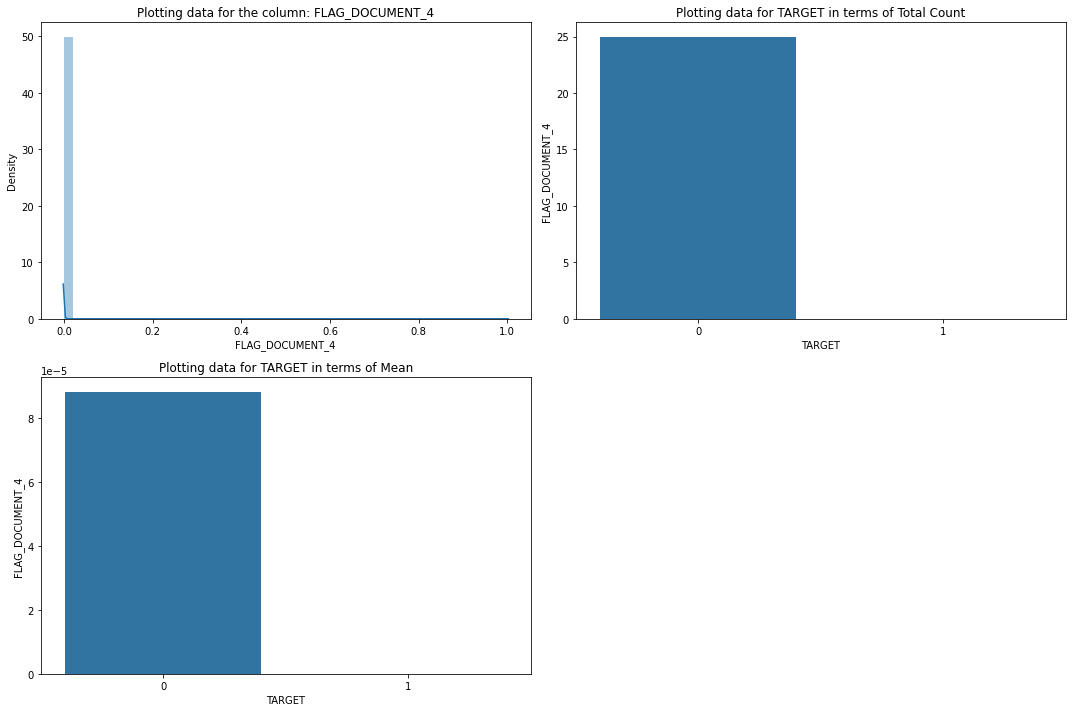



Plotting graphs for FLAG_DOCUMENT_5


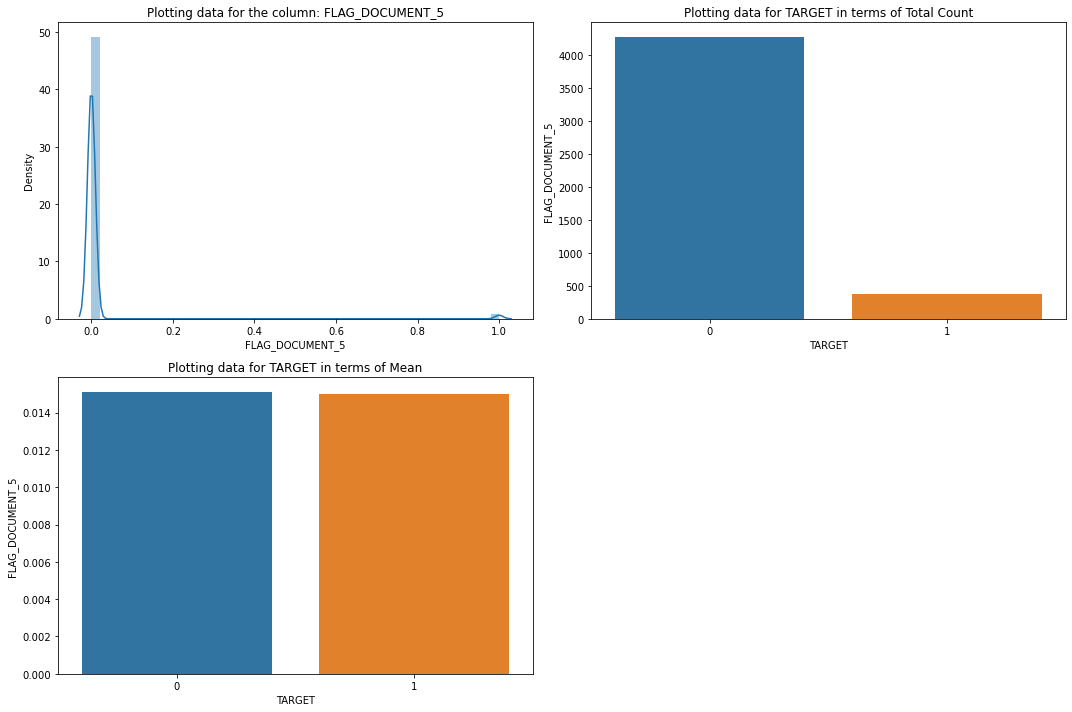



Plotting graphs for FLAG_DOCUMENT_6


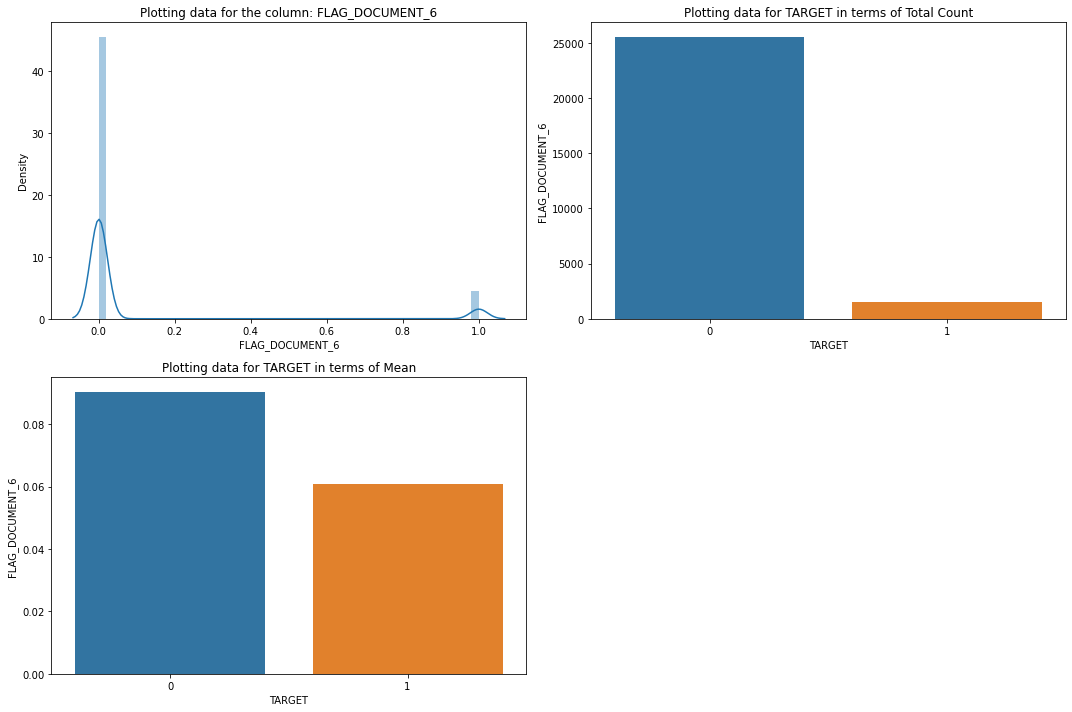



Plotting graphs for FLAG_DOCUMENT_7


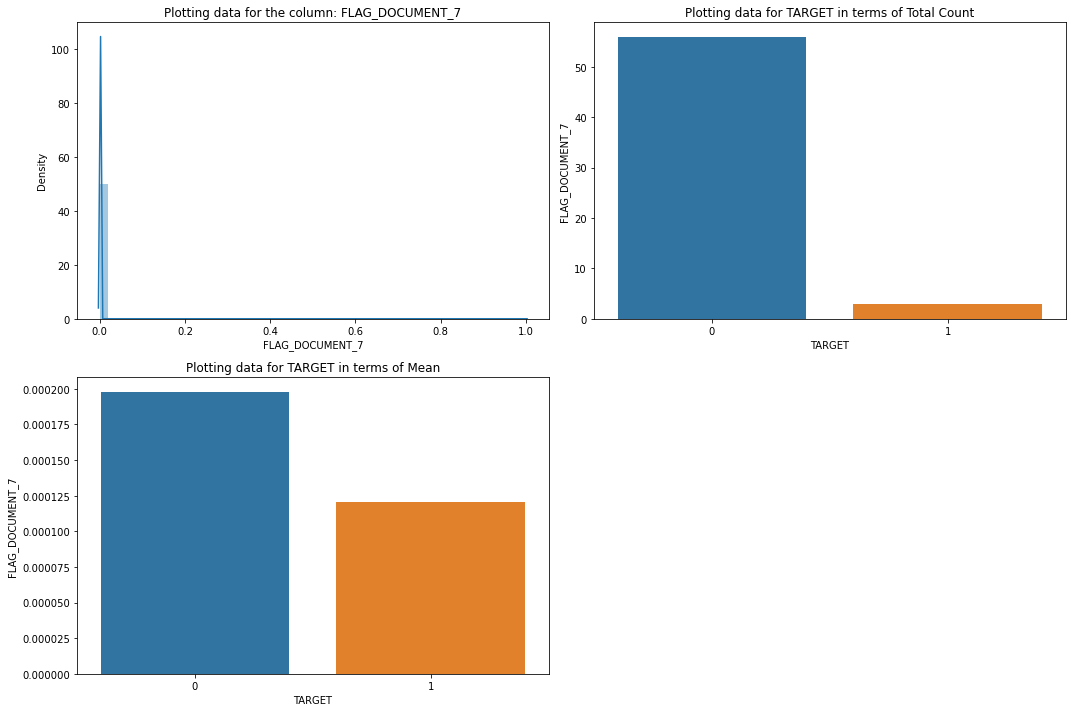



Plotting graphs for FLAG_DOCUMENT_8


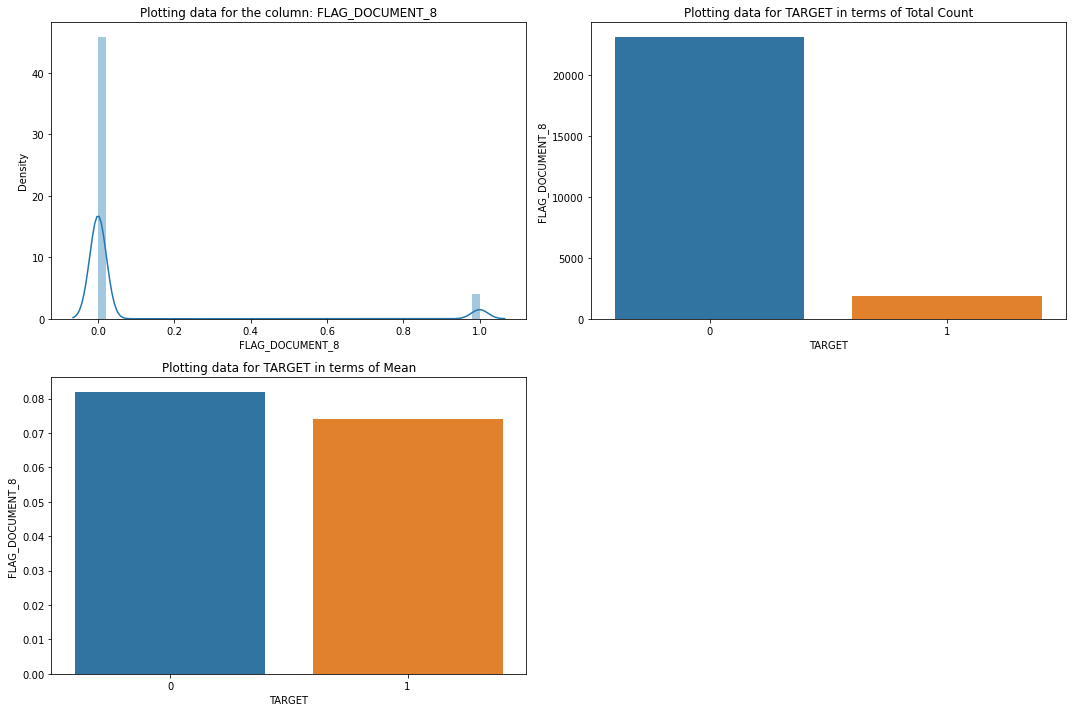



Plotting graphs for FLAG_DOCUMENT_9


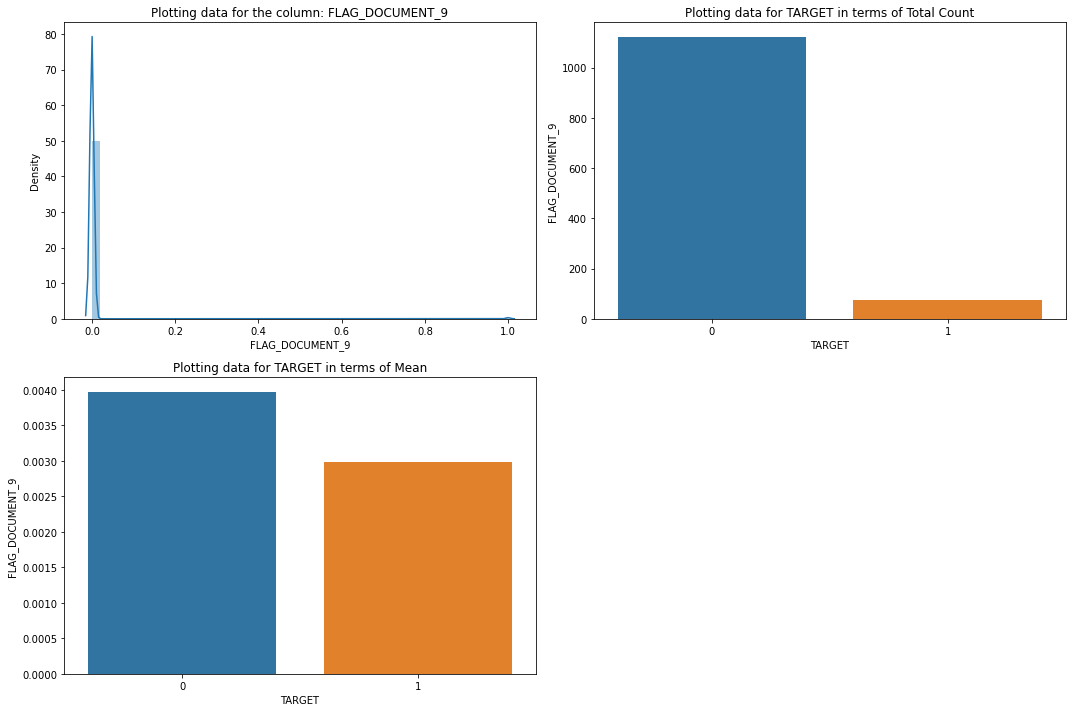



Plotting graphs for FLAG_DOCUMENT_10


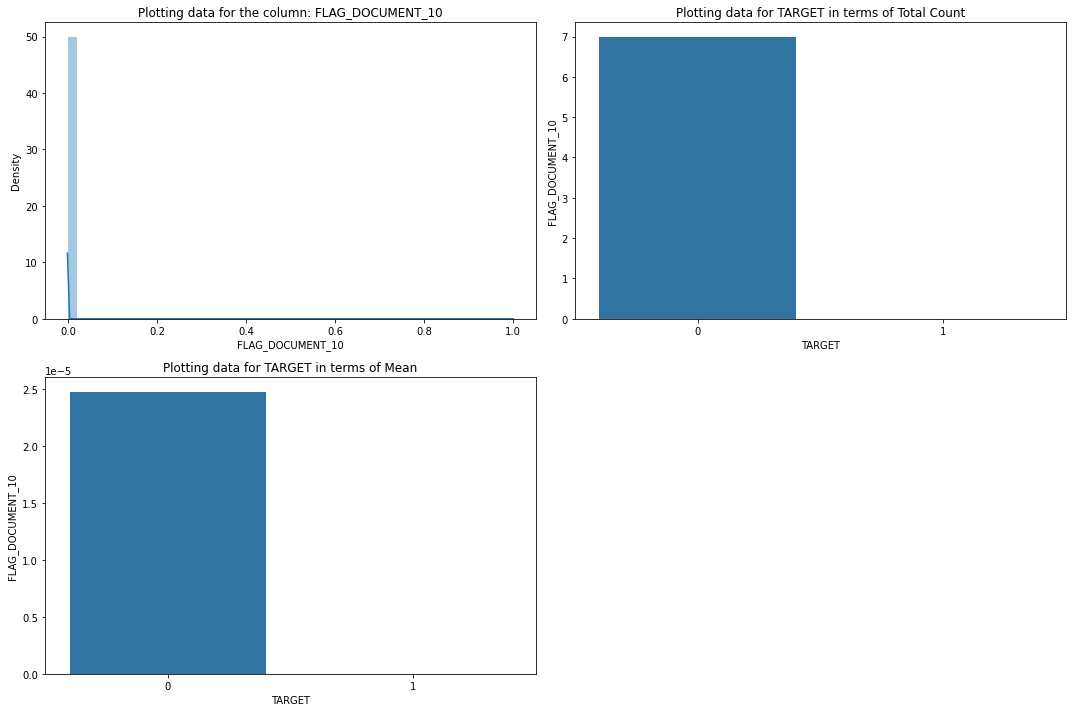



Plotting graphs for FLAG_DOCUMENT_11


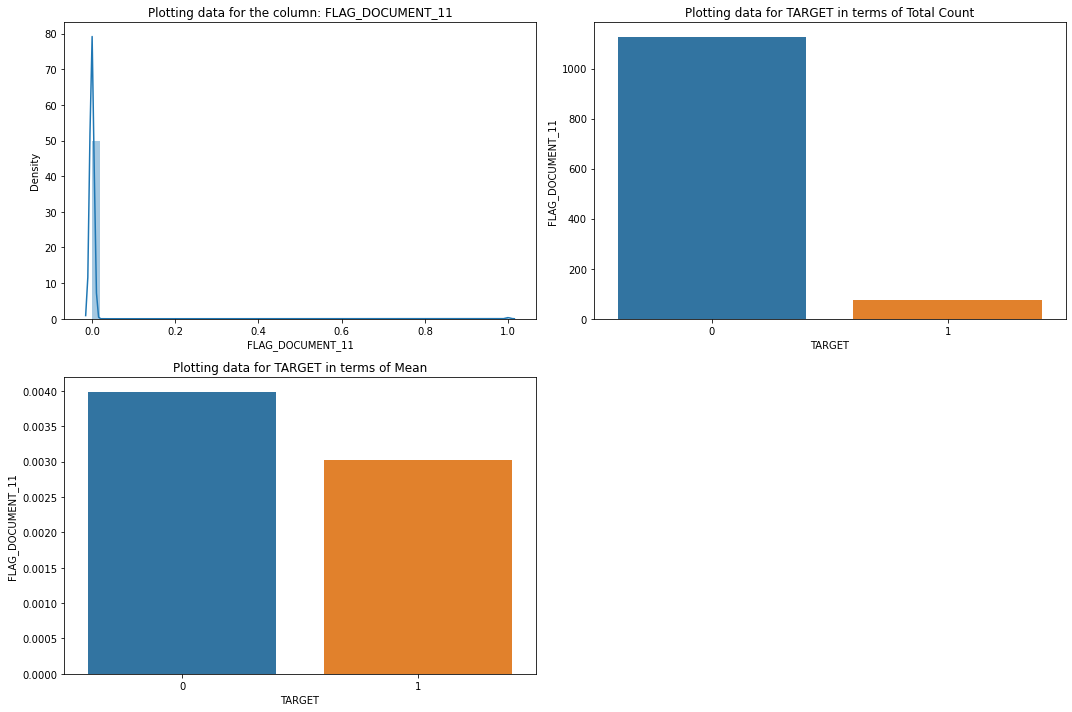



Plotting graphs for FLAG_DOCUMENT_12


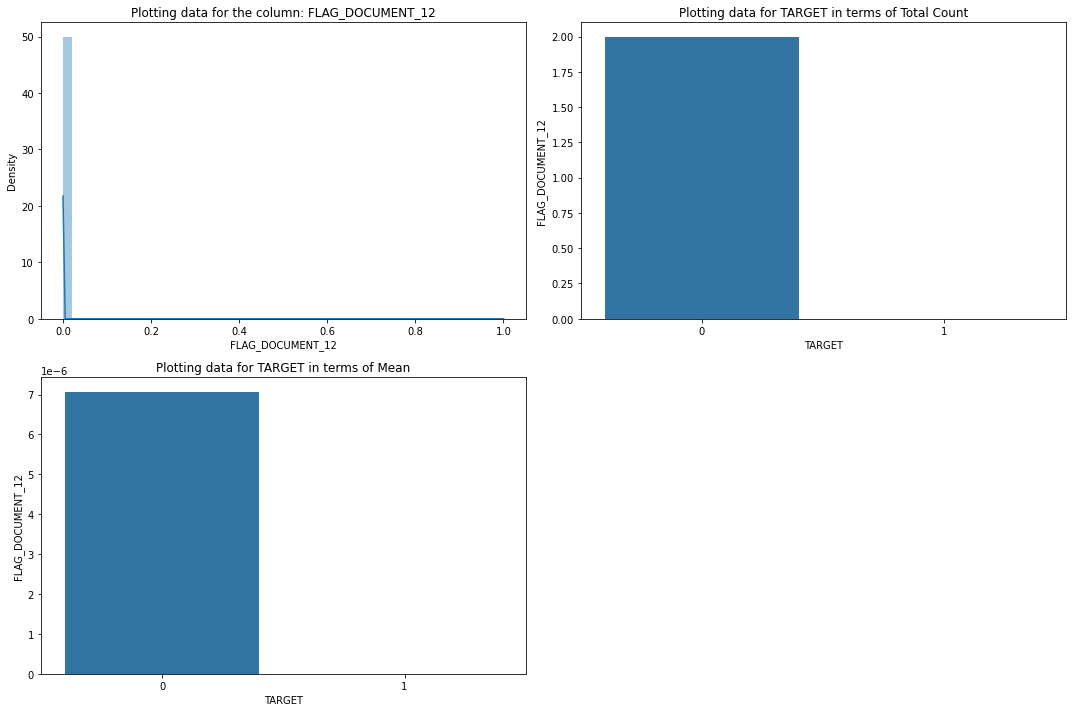



Plotting graphs for FLAG_DOCUMENT_13


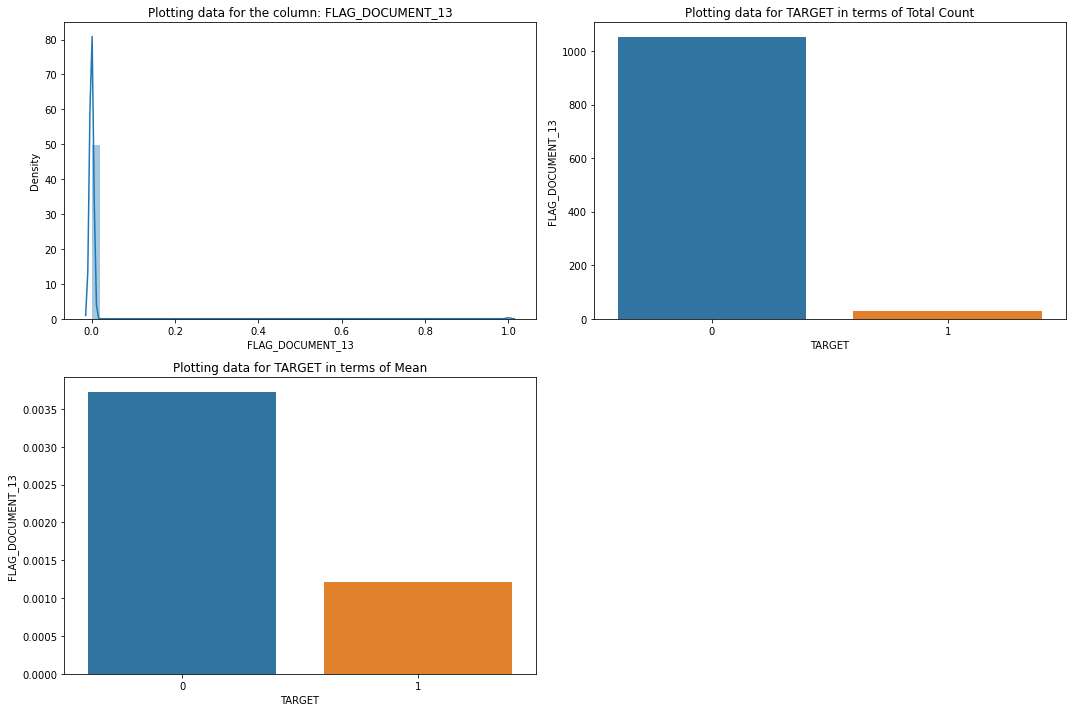



Plotting graphs for FLAG_DOCUMENT_14


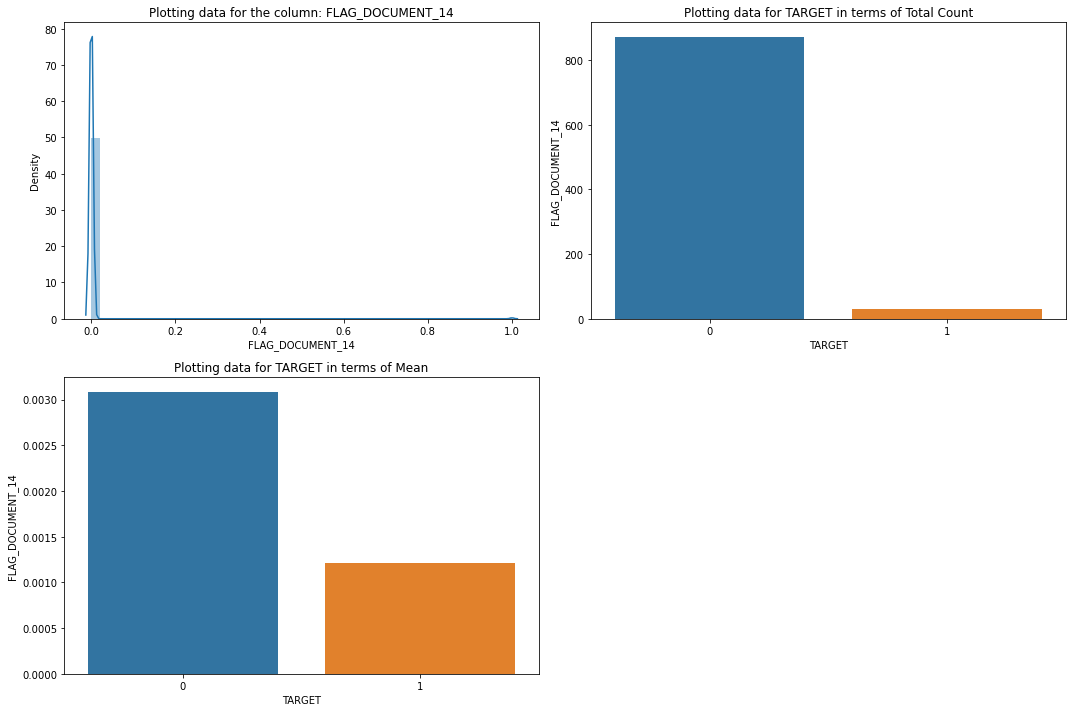



Plotting graphs for FLAG_DOCUMENT_15


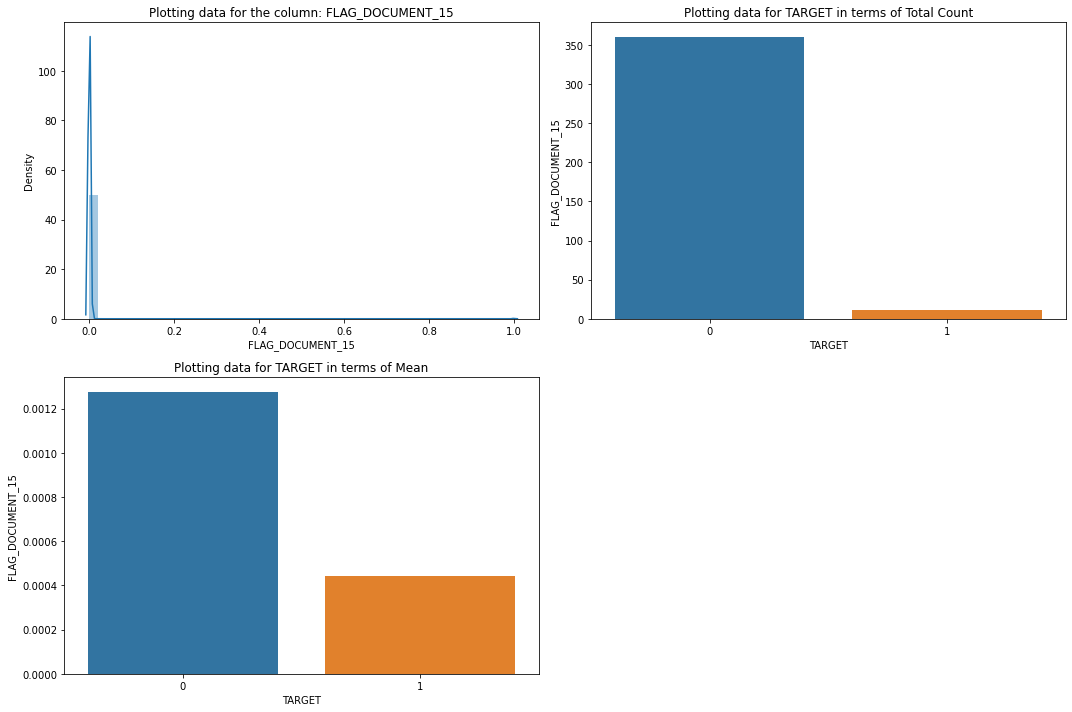



Plotting graphs for FLAG_DOCUMENT_16


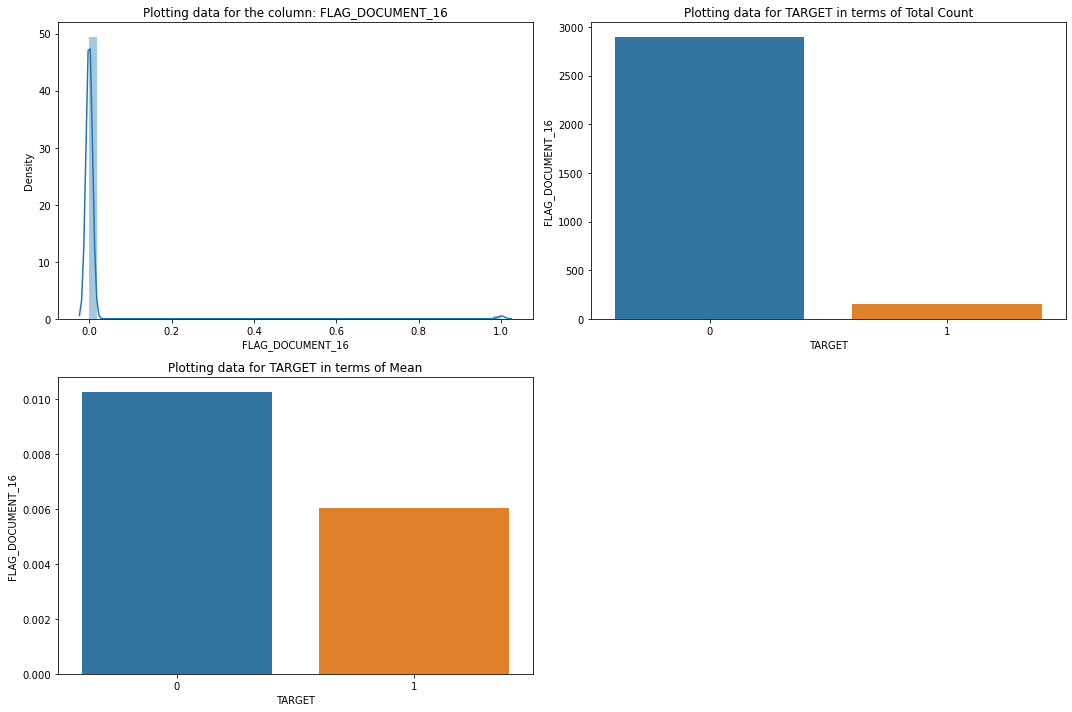



Plotting graphs for FLAG_DOCUMENT_17


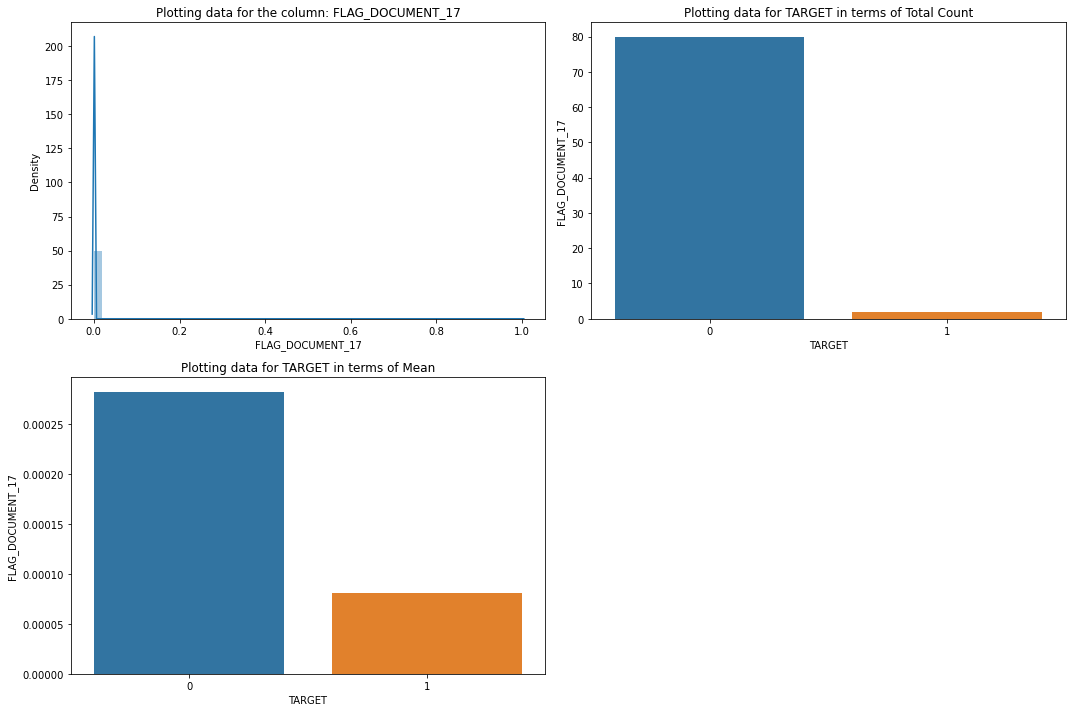



Plotting graphs for FLAG_DOCUMENT_18


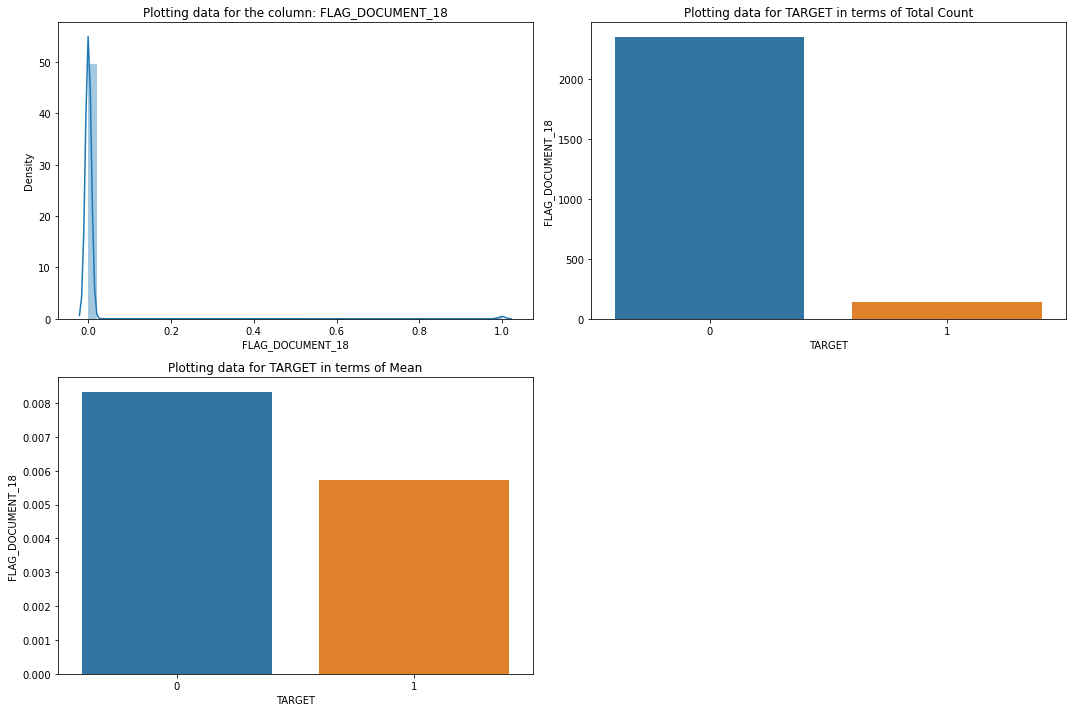



Plotting graphs for FLAG_DOCUMENT_19


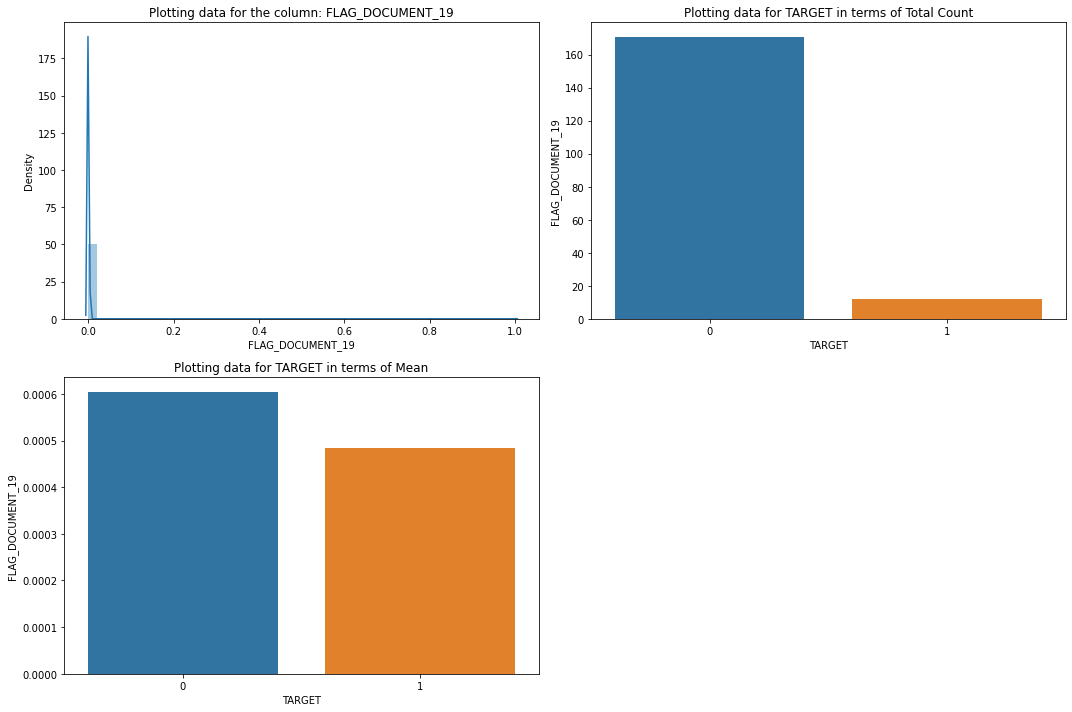



Plotting graphs for FLAG_DOCUMENT_20


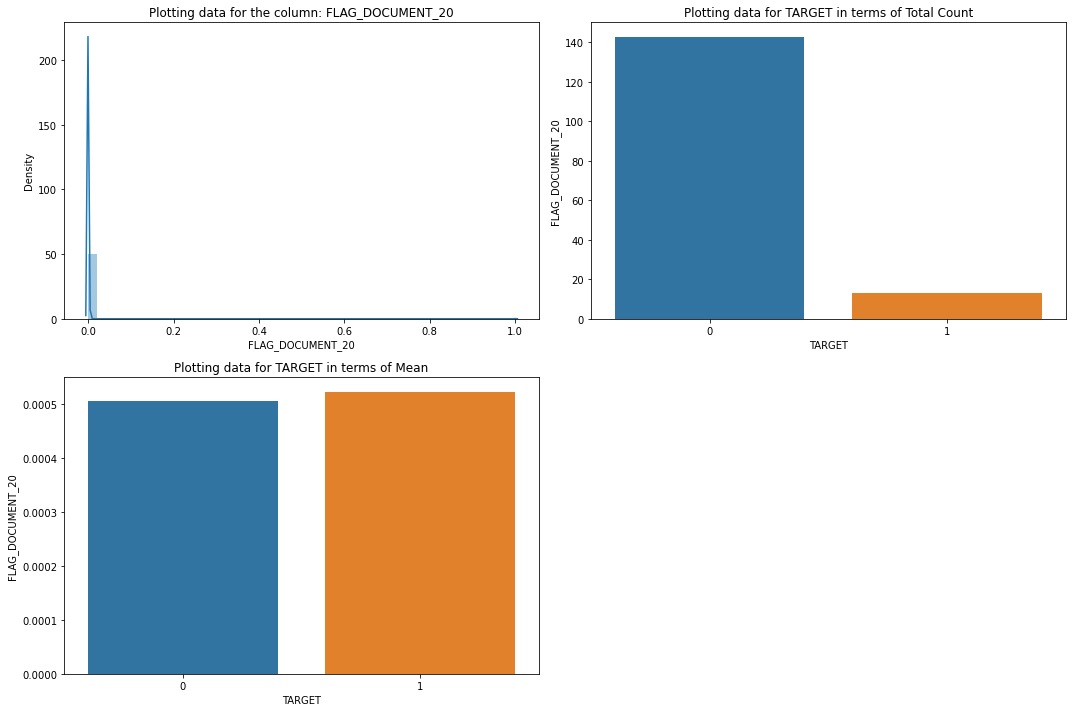



Plotting graphs for FLAG_DOCUMENT_21


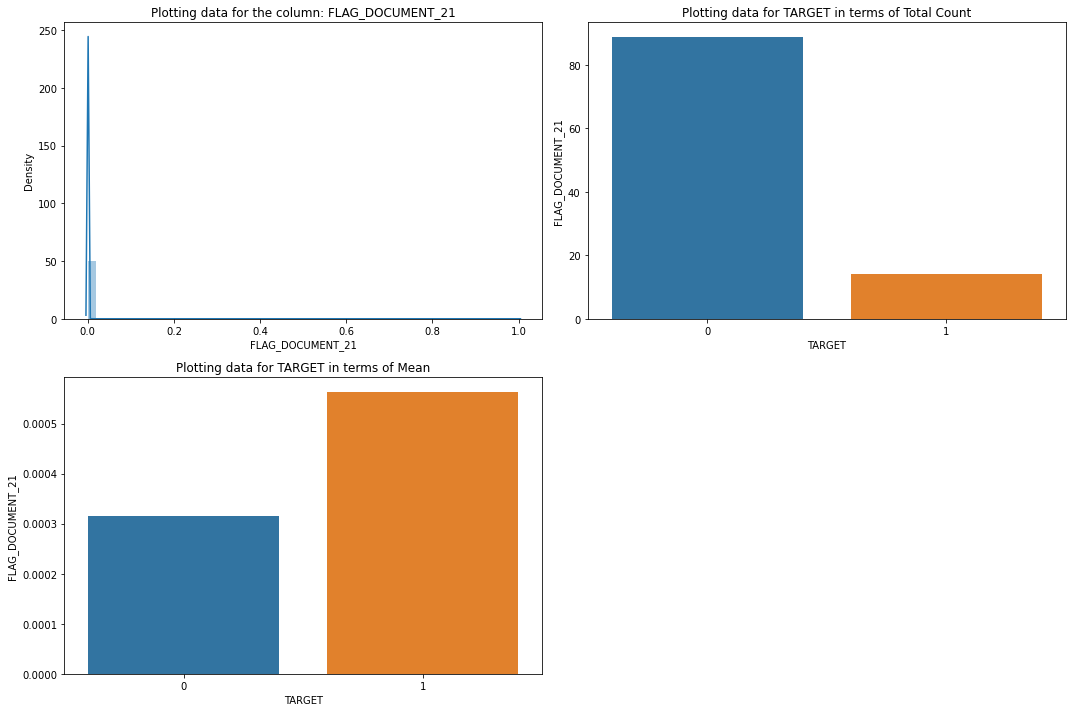

In [43]:
# Listing few columns & pass them to function to plot various charts

num_colns_5 = [  'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

for column in num_colns_5:
    print("Plotting graphs for "+column)
    plot_chart_cont(ApplicationData, Target_0, Target_1, column)
    print("\n========================================================================================================\n")

**Insights from above graphs :**

1. All Defaulters didn't provide Documents - 4,10,12

Plotting graphs for AMT_REQ_CREDIT_BUREAU_HOUR


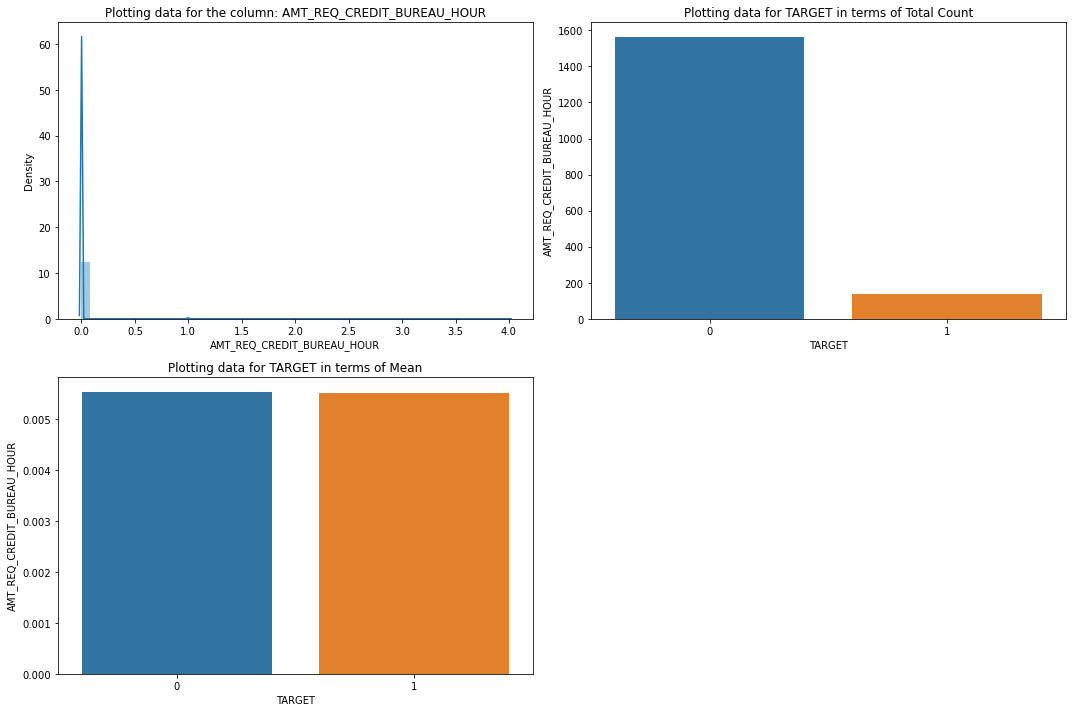



Plotting graphs for AMT_REQ_CREDIT_BUREAU_DAY


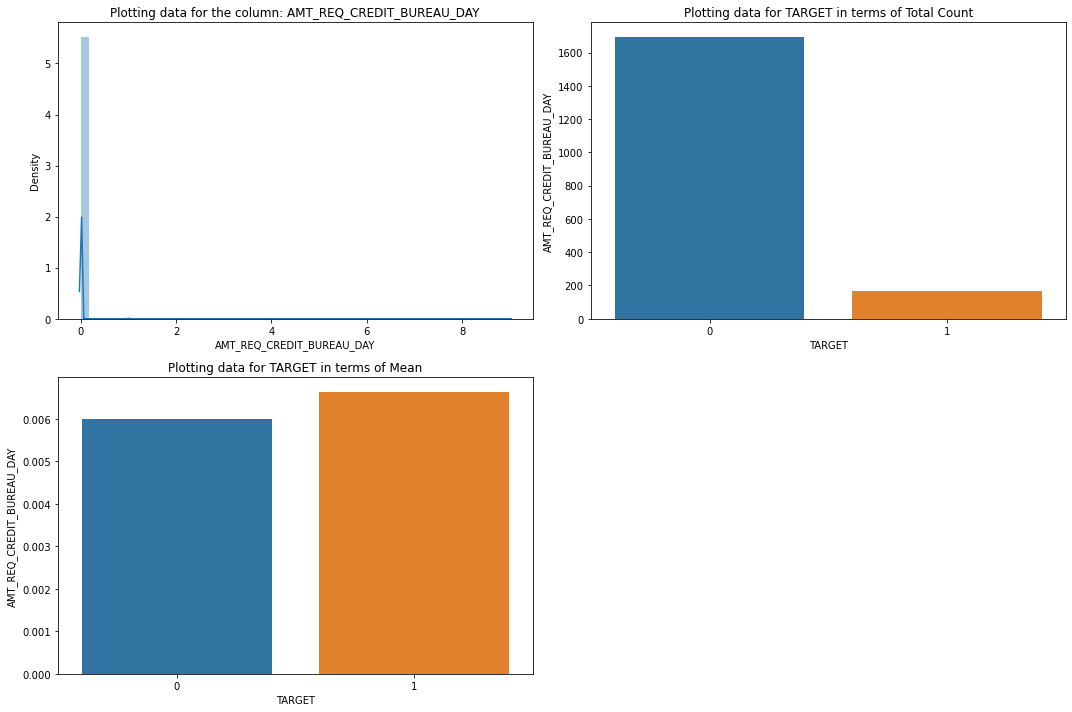



Plotting graphs for AMT_REQ_CREDIT_BUREAU_WEEK


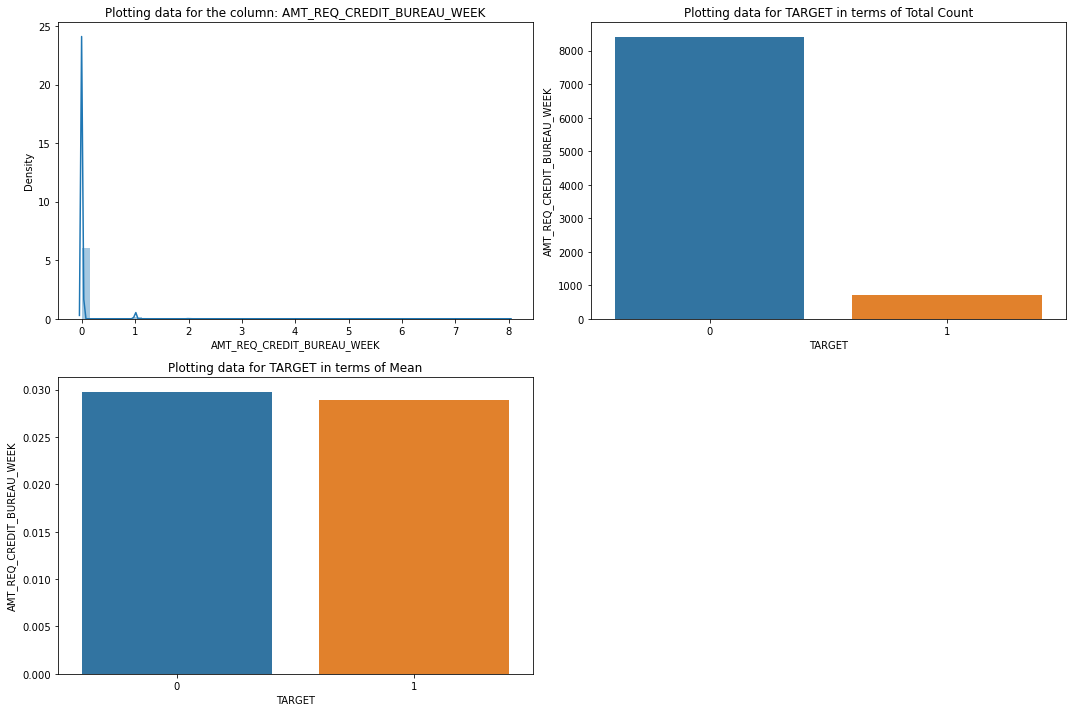



Plotting graphs for AMT_REQ_CREDIT_BUREAU_MON


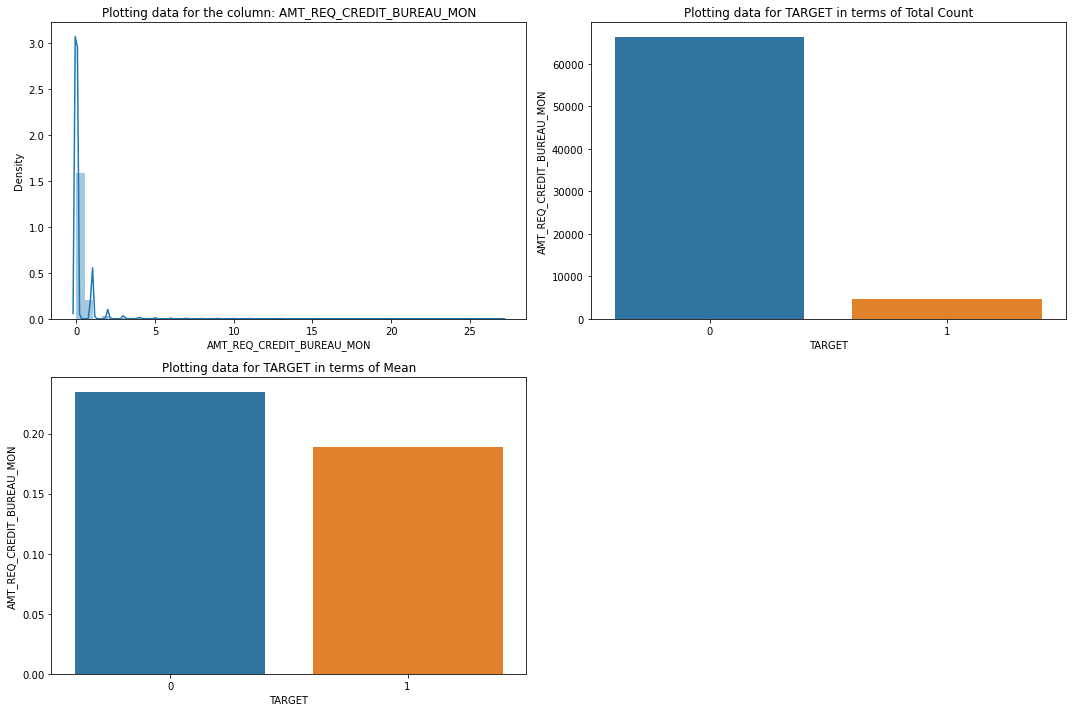



Plotting graphs for AMT_REQ_CREDIT_BUREAU_QRT


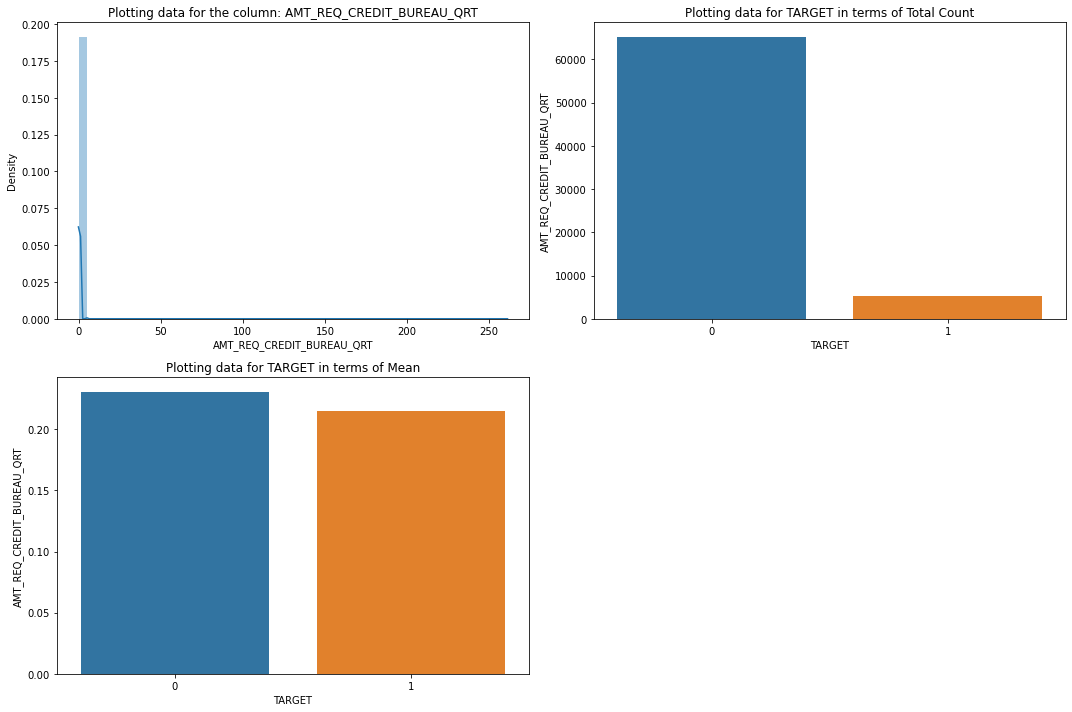



Plotting graphs for AMT_REQ_CREDIT_BUREAU_YEAR


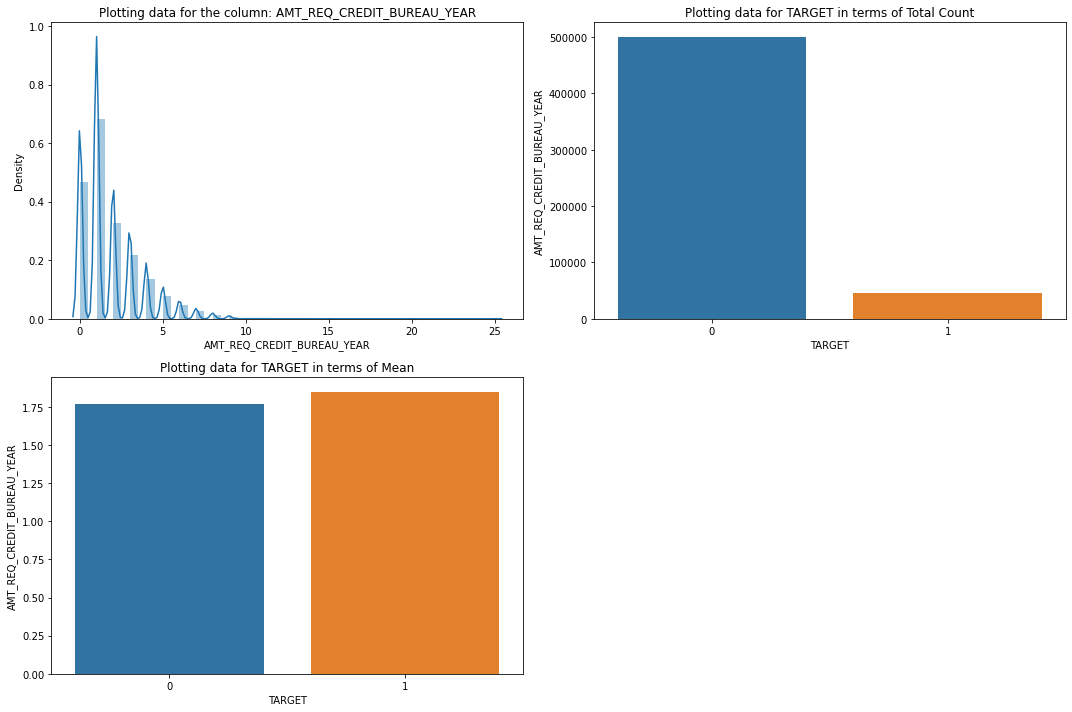

In [44]:
# Listing few columns & pass them to function to plot various charts

num_colns_6 = [ 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']
    
for column in num_colns_6:
    print("Plotting graphs for "+column)
    plot_chart_cont(ApplicationData, Target_0, Target_1, column)
    print("\n========================================================================================================\n")

**Insights from above graphs :**

1. Average no.of enquiries to Credit Bureau about the client one year before application (excluding last 3 months before application) are done more for Defaulters

### Task 3.5 : Bivariate Analysis for numerical variables

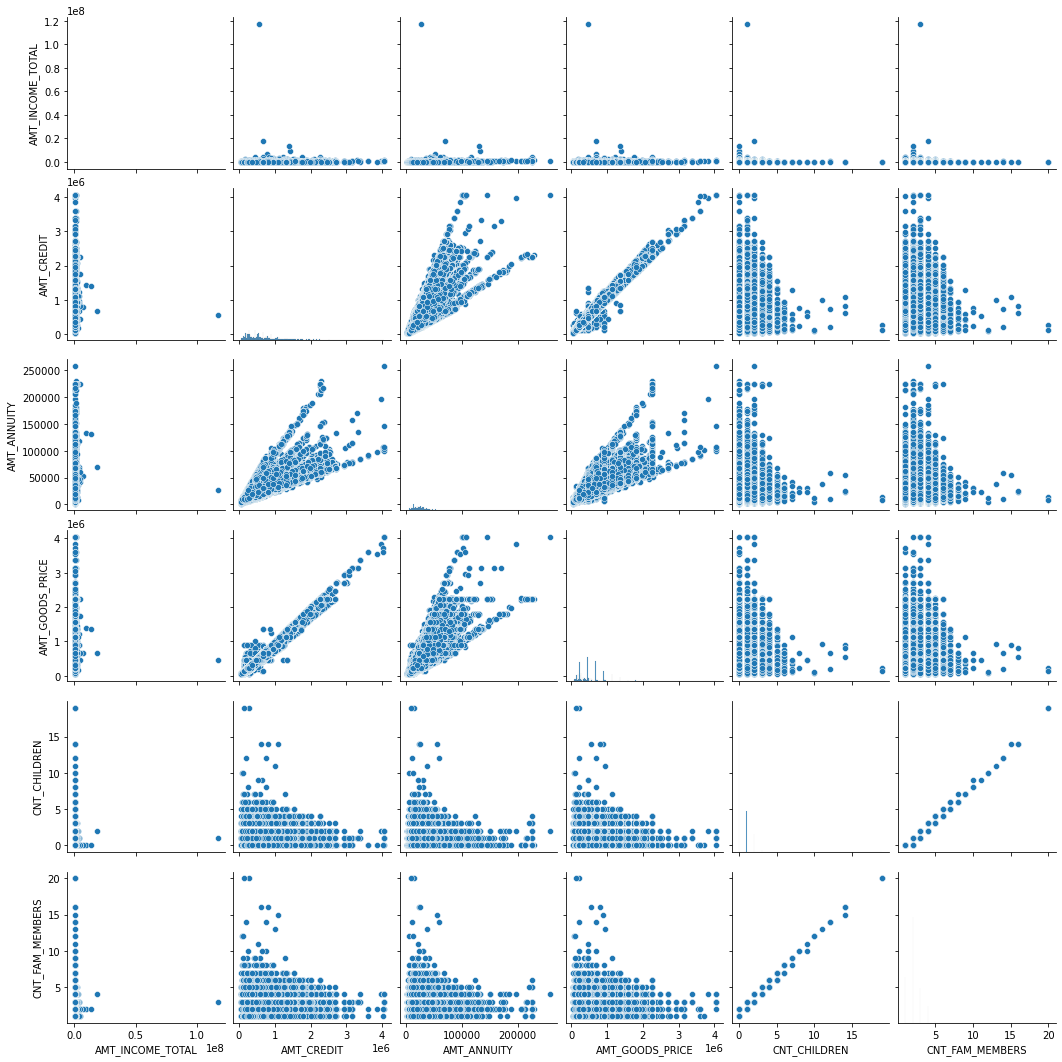

In [45]:
# A pair plot between few numerical continuous variables

sns.pairplot(ApplicationData[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','CNT_CHILDREN', 'CNT_FAM_MEMBERS']],
             kind='scatter', dropna=True)
plt.show()

**Insights from above graph :**

1. There is a positive correlation between Credit Amount and Annuity Amount
2. There is a positive correlation between Credit Amount and Goods Price Amount
3. There is a positive correlation between Annuity Amount and Goods Price Amount
4. As the count of children increases, family members count increases
5. There seems to no of children>10, which is a bit unrealistic
6. Most of the credit/annuity/goods_price amount lies with applicants who have less no.of children & family members